In [ ]:
#Basic imports
import numpy as np
import pandas as pd
import random
random.seed(4)
import matplotlib.pyplot as plt
#Setting size of pandas dataframe display
from google.colab.data_table import DataTable
DataTable.max_columns = 60
#Error imports
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#ML models
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
#Feature selection
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

#Regression

Data Pre-Processing
*   Preparing Datasets for 3 missions(for Reference Systems):



In [ ]:
dataset_train = pd.read_csv('student_performance_train.csv')
dataset_test = pd.read_csv('student_performance_test.csv')

dataset_train_m1 = dataset_train.drop(['G2','G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m1 = dataset_test.drop(['G2','G3','Mjob','Fjob','reason','guardian'],axis=1)

dataset_train_m2 = dataset_train.drop(['G1','G2','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m2 = dataset_test.drop(['G1','G2','Mjob','Fjob','reason','guardian'],axis=1)

dataset_train_m3 = dataset_train.drop(['Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m3 = dataset_test.drop(['Mjob','Fjob','reason','guardian'],axis=1)

*   Label Encoding:

In [ ]:
def label_encode(dataset,labels):
  lb=LabelEncoder()
  for i in labels:
    lb.fit(dataset[i])
    dataset[i]=lb.transform(dataset[i])

labels = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
label_encode(dataset_train_m1, labels)
label_encode(dataset_test_m1, labels)

label_encode(dataset_train_m2, labels)
label_encode(dataset_test_m2, labels)

label_encode(dataset_train_m3, labels)
label_encode(dataset_test_m3, labels)

In [ ]:
def cal_accuracy(y_test_new,y_pred):
  rms = mean_squared_error(y_test_new, y_pred, squared=False)
  mae = mean_absolute_error(y_test_new, y_pred)
  r2 = r2_score(y_test_new, y_pred)
  print("Root Mean Squared Error:", rms)
  print("Mean Absolute Error:", mae)
  print("R2 Score:", r2)


Reference Systems:
---



Trivial System

In [ ]:
def trivial_system_pred(dataset1,dataset2,label):
  y_true = dataset2[label]
  mean = dataset1[label].mean()
  y_pred = [mean]*len(y_true)
  cal_accuracy(y_true,y_pred)
  


*   Mission 1: (Predict G1 without G2 and G3)

In [ ]:
trivial_system_pred(dataset_train_m1,dataset_test_m1,'G1')

*   Mission 2: (Predict G3 without G1 and G2)

In [ ]:
trivial_system_pred(dataset_train_m2,dataset_test_m2,'G3')

*   Mission 3: (Predict G3 wit G1 and G2)

In [ ]:
trivial_system_pred(dataset_train_m3,dataset_test_m3,'G3')

Baseline Systems:


*   1NN


In [ ]:
def nn_pred(data_train,data_test):
  X_train = np.array(data_train.iloc[:,:-1])
  y_train = np.array(data_train.iloc[:,-1])
  X_test = np.array(data_test.iloc[:,:-1])
  y_test = np.array(data_test.iloc[:,-1])
  neighbors_regressor = KNeighborsRegressor(n_neighbors=1)
  neighbors_regressor.fit(X_train, y_train)
  y_pred_neigbors = neighbors_regressor.predict(X_test)
  np.set_printoptions(precision=2)
  cal_accuracy(y_test,y_pred_neigbors)

*   Mission 1: (Predict G1 without G2 and G3)


In [ ]:
nn_pred(dataset_train_m1,dataset_test_m1)

*   Mission 2: (Predict G3 without G1 and G2)

In [ ]:
nn_pred(dataset_train_m2,dataset_test_m2)

*   Mission 3: (Predict G3 with G1 and G2)

In [ ]:
nn_pred(dataset_train_m3,dataset_test_m3)

*   Linear Regression (without regularization)

In [ ]:
def regression_pred(data_train,data_test):
  X_train = np.array(data_train.iloc[:,:-1])
  y_train = np.array(data_train.iloc[:,-1])
  X_test = np.array(data_test.iloc[:,:-1])
  y_test = np.array(data_test.iloc[:,-1])
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  np.set_printoptions(precision=2)
  cal_accuracy(y_test,y_pred)

*   Mission 1: (Predict G1 without G2 and G3)

In [ ]:
regression_pred(dataset_train_m1,dataset_test_m1)

*   Mission 2: (Predict G3 without G1 and G2)

In [ ]:
regression_pred(dataset_train_m2,dataset_test_m2)

*   Mission 3: (Predict G3 with G1 and G2)

In [ ]:
regression_pred(dataset_train_m3,dataset_test_m3)


Implemented Models with Feature Engineering:
---



Preparing Datasets for our models:


In [ ]:
dataset_train = pd.read_csv('student_performance_train.csv')
dataset_test = pd.read_csv('student_performance_test.csv')



dataset_train_m1 = dataset_train.drop(['G2','G3'],axis=1)
dataset_test_m1 = dataset_test.drop(['G2','G3'],axis=1)

dataset_train_m2 = dataset_train.drop(['G1','G2'],axis=1)
dataset_test_m2 = dataset_test.drop(['G1','G2'],axis=1)

dataset_train_m3 = dataset_train.copy()
dataset_test_m3 = dataset_test.copy()

label_encode(dataset_train_m1, labels)
label_encode(dataset_test_m1, labels)

label_encode(dataset_train_m2, labels)
label_encode(dataset_test_m2, labels)

label_encode(dataset_train_m3, labels)
label_encode(dataset_test_m3, labels)


Function for mutual info with Regression Model:

In [ ]:
from sklearn.feature_selection import mutual_info_regression as MIR
def MIR_regmodel(data_train,data_test,reg,param):
  X = data_train.iloc[:,:-1]
  y = data_train.iloc[:,-1]

  X_test_new = data_test.iloc[:,:-1]
  y_test_new = data_test.iloc[:,-1]

  mutual_info_features = MIR(X, y)
  mutual_info_features_plot = pd.Series(mutual_info_features, data_train.columns[0:len(data_train.columns)-1])

  mi_score_selected_index = np.where(mutual_info_features >param)[0]
  selected_feat = mi_score_selected_index.tolist()

  X_train_new = np.array(X.iloc[:,selected_feat])
  y_train_new = np.array(y)

  X_test_new = np.array(X_test_new.iloc[:,selected_feat])
  y_test_new = np.array(y_test_new)

  regressor = reg
  regressor.fit(X_train_new, y_train_new)

  y_pred = regressor.predict(X_test_new)

  cal_accuracy(y_test_new,y_pred)

Function for Recursive Feature Elimination with Regression Model:

In [ ]:
from sklearn.feature_selection import RFECV
def RFE_regmodel(data_train,data_test,est,reg,param):
  X = data_train.iloc[:,:-1]
  y = data_train.iloc[:,-1]

  X_test_new = data_test.iloc[:,:-1]
  y_test_new = data_test.iloc[:,-1]
  estimator = est
  cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
  selector = RFECV(estimator, step=1,cv=cv_inner)
  selector = selector.fit(X, y)
  columns_req = data_train.iloc[:,:-1].columns[selector.get_support()]
  X_train_new = np.array(X.loc[:,columns_req])
  y_train_new = np.array(y)
  X_test_new = np.array(X_test_new.loc[:,columns_req])
  y_test_new = np.array(y_test_new)

  regressor = reg
  regressor.fit(X_train_new, y_train_new)

  y_pred = regressor.predict(X_test_new)

  cal_accuracy(y_test_new,y_pred)

Function for f_regression feature selection with Regression Model:

In [ ]:
from sklearn.feature_selection import f_regression
import math
import operator
def getTopFeatures(train_x, train_y, n_features):
    f_val, p_val = f_regression(train_x,train_y)
    f_val_dict = {}
    p_val_dict = {}
    for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
    sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    
    feature_indexs = []
    for i in range(0,n_features):
        feature_indexs.append(sorted_f[i][0])
    
    return feature_indexs
def f_reg_regmodel(data_train,data_test,reg):
  X = data_train.iloc[:,:-1]
  y = data_train.iloc[:,-1]

  X_test_new = data_test.iloc[:,:-1]
  y_test_new = data_test.iloc[:,-1]

  feat_ind = getTopFeatures(X,y,30)

  X_train_new = np.array(X.iloc[:,feat_ind])
  y_train_new = np.array(y)
  X_test_new = np.array(X_test_new.iloc[:,feat_ind])
  y_test_new = np.array(y_test_new)

  regressor = reg
  regressor.fit(X_train_new, y_train_new)

  y_pred = regressor.predict(X_test_new)

  cal_accuracy(y_test_new,y_pred)


Function for PCA with Regression Model:

In [ ]:
def PCA_regmodel(data_train,data_test,reg,param):
  X_train_new = np.array(data_train.iloc[:,:-1])
  y_train_new = np.array(data_train.iloc[:,-1])

  X_test_new = np.array(data_test.iloc[:,:-1])
  y_test_new = np.array(data_test.iloc[:,-1])




  from sklearn.decomposition import PCA
  pca = PCA(n_components=param) #can change number of components


  X_train_new = pca.fit_transform(X_train_new)
  X_test_new = pca.transform(X_test_new)
  regressor = reg
  regressor.fit(X_train_new, y_train_new)

  y_pred = regressor.predict(X_test_new)

  cal_accuracy(y_test_new,y_pred)

#Working on Mission 1:


In [ ]:
mjobs = pd.get_dummies(dataset_train_m1.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_train_m1.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_train_m1.reason, prefix='reason')
guardian = pd.get_dummies(dataset_train_m1.guardian, prefix='guardian')
g1 = dataset_train_m1.iloc[:,-1]

dataset_train_m1 = dataset_train_m1.drop(['G1','Mjob','Fjob','reason','guardian'],axis=1)
dataset_train_m1 = pd.concat([dataset_train_m1, mjobs, fjobs, reason, guardian,g1], axis=1)


mjobs = pd.get_dummies(dataset_test_m1.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_test_m1.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_test_m1.reason, prefix='reason')
guardian = pd.get_dummies(dataset_test_m1.guardian, prefix='guardian')
g1 = dataset_test_m1.iloc[:,-1]

dataset_test_m1 = dataset_test_m1.drop(['G1','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m1 = pd.concat([dataset_test_m1, mjobs, fjobs, reason, guardian,g1], axis=1)


Datasets for Standardization and Normalization:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scalar = StandardScaler()
m1_train_scale = dataset_train_m1.copy()
m1_test_scale = dataset_test_m1.copy()

m1_train_norm = dataset_train_m1.copy()
m1_test_norm = dataset_test_m1.copy()
# data1 = dataset_train_m1.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]]
m1_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.fit_transform(m1_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m1_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.transform(m1_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m1_test_scale

norm = MinMaxScaler()
m1_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.fit_transform(m1_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m1_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.transform(m1_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])

Support Vector Regression
---


1.   Feature Selection Technique Used - Mutual Information




In [ ]:
MIR_regmodel(dataset_train_m1,dataset_test_m1,reg = SVR(kernel='linear'),param=0.01)

Root Mean Squared Error: 2.4398354922442076
Mean Absolute Error: 1.87699906306448
R2 Score: 0.26216950343350376


*   Standardization


In [ ]:
MIR_regmodel(m1_train_scale,m1_test_scale,reg = SVR(kernel='linear'),param=0.01)

Root Mean Squared Error: 2.4772055402077586
Mean Absolute Error: 1.853713928991253
R2 Score: 0.23939426143901132


*   Normalization


In [ ]:
MIR_regmodel(m1_train_norm,m1_test_norm,reg = SVR(kernel='linear'),param=0.01)

Root Mean Squared Error: 2.466780927611809
Mean Absolute Error: 1.8945795847188607
R2 Score: 0.2457823762118897


2.   Feature Selection Technique Used - Recursive Feature Elimination


In [ ]:
RFE_regmodel(dataset_train_m1,dataset_test_m1,est= SVR(kernel = 'linear'),reg=SVR(kernel = 'rbf'),param=40)

Root Mean Squared Error: 2.4082510498120038
Mean Absolute Error: 1.8238819845140066
R2 Score: 0.2811487553690466


*   Standardization


In [ ]:
RFE_regmodel(m1_train_scale,m1_test_scale,est= SVR(kernel = 'linear'),reg=SVR(kernel = 'rbf'),param=30)

Root Mean Squared Error: 2.467959726474623
Mean Absolute Error: 1.875484911795629
R2 Score: 0.24506136909113707


*   Normalization


In [ ]:
RFE_regmodel(m1_train_norm,m1_test_norm,est= SVR(kernel = 'linear'),reg=SVR(kernel = 'rbf'),param=30)

Root Mean Squared Error: 2.402218511421096
Mean Absolute Error: 1.7822474352586697
R2 Score: 0.28474561158966616


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m1,dataset_test_m1, reg = SVR(kernel='linear'),param = 30)

Root Mean Squared Error: 2.4820592747730292
Mean Absolute Error: 1.8940482684839903
R2 Score: 0.2364107422573395




*   Standardization



In [ ]:
PCA_regmodel(m1_train_scale,m1_test_scale, reg = SVR(kernel='linear'),param = 25)

Root Mean Squared Error: 2.4845578712193985
Mean Absolute Error: 1.8794499821284276
R2 Score: 0.23487261483882416




*   Normalization



In [ ]:
PCA_regmodel(m1_train_norm,m1_test_norm, reg = SVR(kernel='linear'),param = 30)

Root Mean Squared Error: 2.531662922208288
Mean Absolute Error: 1.9126158859385294
R2 Score: 0.20558529467947217


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m1,dataset_test_m1,reg = SVR(kernel='linear'))

Root Mean Squared Error: 2.44035326923395
Mean Absolute Error: 1.8287406338171468
R2 Score: 0.26185630839091845




*   Standardization




In [ ]:
f_reg_regmodel(m1_train_scale,m1_test_scale,reg = SVR(kernel='linear'))

Root Mean Squared Error: 2.4399080722826354
Mean Absolute Error: 1.8296213167338633
R2 Score: 0.26212560493092774


*   Normalization

In [ ]:
f_reg_regmodel(m1_train_norm,m1_test_norm,reg = SVR(kernel='linear'))

Root Mean Squared Error: 2.4643714199779687
Mean Absolute Error: 1.84308919074972
R2 Score: 0.24725506926865903


Ridge Regression
---

In [ ]:
from sklearn import linear_model

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m1,dataset_test_m1,reg = linear_model.Ridge(alpha=20),param = 0.01)

Root Mean Squared Error: 2.4578632487791476
Mean Absolute Error: 1.8333055958364137
R2 Score: 0.2512256752826689


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m1,dataset_test_m1,est =linear_model.Ridge(alpha = 20),reg = linear_model.Ridge(alpha = 15),param= 35)

Root Mean Squared Error: 2.4455504138621214
Mean Absolute Error: 1.84911650840248
R2 Score: 0.2587089571199268




*   Standardization




In [ ]:
RFE_regmodel(m1_train_scale,m1_test_scale,est =linear_model.Ridge(alpha = 20),reg = linear_model.Ridge(alpha = 15),param= 35)

Root Mean Squared Error: 2.4317021627402218
Mean Absolute Error: 1.8211281327717266
R2 Score: 0.26708050353860835


*   Normalization

In [ ]:
RFE_regmodel(m1_train_norm,m1_test_norm,est =linear_model.Ridge(alpha = 20),reg = linear_model.Ridge(alpha = 15),param= 35)

Root Mean Squared Error: 2.4537842672266574
Mean Absolute Error: 1.8562817342
R2 Score: 0.2537088909850047


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m1,dataset_test_m1, reg = linear_model.Ridge(alpha = 10), param=35)

Root Mean Squared Error: 2.4185944474203596
Mean Absolute Error: 1.8204548467760806
R2 Score: 0.27496058688302216


*  Standardization


In [ ]:
PCA_regmodel(m1_train_scale,m1_test_scale, reg = linear_model.Ridge(alpha = 10), param=35)

Root Mean Squared Error: 2.420267572332687
Mean Absolute Error: 1.820743202205037
R2 Score: 0.27395711059044703


*  Normalization

In [ ]:
PCA_regmodel(m1_train_norm,m1_test_norm, reg = linear_model.Ridge(alpha = 10), param=35)

Root Mean Squared Error: 2.442351042200052
Mean Absolute Error: 1.8471009691707037
R2 Score: 0.2606472644934379


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m1,dataset_test_m1,reg = linear_model.Ridge(alpha = 20))

Root Mean Squared Error: 2.4407421106729545
Mean Absolute Error: 1.8217796818016987
R2 Score: 0.2616210607113746


Random Forest Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m1,dataset_test_m1,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 0.01)

Root Mean Squared Error: 2.4651148518847266
Mean Absolute Error: 1.897918477943325
R2 Score: 0.2468008365952461


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m1,dataset_test_m1,est = RandomForestRegressor(), reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 30)

Root Mean Squared Error: 2.37603962392855
Mean Absolute Error: 1.8063680981595092
R2 Score: 0.30025005952658645


*  Standardization


In [ ]:
RFE_regmodel(m1_train_scale,m1_test_scale,est = RandomForestRegressor(), reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 30)

Root Mean Squared Error: 2.3768318605344247
Mean Absolute Error: 1.807226993865031
R2 Score: 0.29978335018986924


*  Normalization

In [ ]:
RFE_regmodel(m1_train_norm,m1_test_norm,est = RandomForestRegressor(), reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 30)

Root Mean Squared Error: 2.3754834238387175
Mean Absolute Error: 1.8061717791411047
R2 Score: 0.3005776259715056


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m1,dataset_test_m1,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 35 )

Root Mean Squared Error: 2.631084588231524
Mean Absolute Error: 2.0264171779141105
R2 Score: 0.14196474240289603


*  Standardization


In [ ]:
PCA_regmodel(m1_train_scale,m1_test_scale,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 35 )

Root Mean Squared Error: 2.5962382130489696
Mean Absolute Error: 2.0082453987730062
R2 Score: 0.16454206510603742


*  Normalization

In [ ]:
PCA_regmodel(m1_train_norm,m1_test_norm,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 35 )

Root Mean Squared Error: 2.4628508893287644
Mean Absolute Error: 1.9000245398773004
R2 Score: 0.24818367818322618


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m1,dataset_test_m1,reg = RandomForestRegressor(n_estimators = 500, random_state = 4))

Root Mean Squared Error: 2.4385625203476273
Mean Absolute Error: 1.8634723926380368
R2 Score: 0.26293922128402025


k Nearest Neighbor Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m1,dataset_test_m1,reg = KNeighborsRegressor(n_neighbors=25), param = 0.06)

Root Mean Squared Error: 2.6127971988759455
Mean Absolute Error: 1.9393865030674846
R2 Score: 0.15385086257569114


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m1,dataset_test_m1,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 2.7509284545337036
Mean Absolute Error: 2.1355828220858895
R2 Score: 0.062018865635992126


*  Standardization


In [ ]:
RFE_regmodel(m1_train_scale,m1_test_scale,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 2.666435317162878
Mean Absolute Error: 2.025153374233129
R2 Score: 0.11875306729863122


*  Normalization

In [ ]:
RFE_regmodel(m1_train_norm,m1_test_norm,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 2.651510161204238
Mean Absolute Error: 2.018711656441718
R2 Score: 0.12859087367861255


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m1,dataset_test_m1,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 2.758953633784779
Mean Absolute Error: 2.135889570552147
R2 Score: 0.05653820944401411


*  Standardization


In [ ]:
PCA_regmodel(m1_train_scale,m1_test_scale,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 2.6270332470263096
Mean Absolute Error: 1.9947852760736198
R2 Score: 0.1446051115423731


*  Normalization

In [ ]:
PCA_regmodel(m1_train_norm,m1_test_norm,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 2.656918852997028
Mean Absolute Error: 2.020552147239264
R2 Score: 0.12503215415333235


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m1,dataset_test_m1,reg = KNeighborsRegressor(n_neighbors=20))

Root Mean Squared Error: 2.7015787249980265
Mean Absolute Error: 2.0717791411042943
R2 Score: 0.09537045503316899


#Working on Mission 2:


In [ ]:
mjobs = pd.get_dummies(dataset_train_m2.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_train_m2.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_train_m2.reason, prefix='reason')
guardian = pd.get_dummies(dataset_train_m2.guardian, prefix='guardian')
g3 = dataset_train_m2.iloc[:,-1]

dataset_train_m2 = dataset_train_m2.drop(['G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_train_m2 = pd.concat([dataset_train_m2, mjobs, fjobs, reason, guardian,g3], axis=1)


mjobs = pd.get_dummies(dataset_test_m2.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_test_m2.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_test_m2.reason, prefix='reason')
guardian = pd.get_dummies(dataset_test_m2.guardian, prefix='guardian')
g3 = dataset_test_m2.iloc[:,-1]

dataset_test_m2 = dataset_test_m2.drop(['G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m2 = pd.concat([dataset_test_m2, mjobs, fjobs, reason, guardian,g3], axis=1)

In [ ]:
scalar = StandardScaler()
m2_train_scale = dataset_train_m2.copy()
m2_test_scale = dataset_test_m2.copy()

m2_train_norm = dataset_train_m2.copy()
m2_test_norm = dataset_test_m2.copy()
# data1 = dataset_train_m1.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]]
m2_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.fit_transform(m2_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m2_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.transform(m2_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m2_test_scale

norm = MinMaxScaler()
m2_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.fit_transform(m2_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m2_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.transform(m2_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])

Support Vector Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m2,dataset_test_m2,reg = SVR(kernel='linear'),param=0.01)

Root Mean Squared Error: 2.7573769897510005
Mean Absolute Error: 2.0550423388277124
R2 Score: 0.2454748692396438


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m2,dataset_test_m2,est = SVR(kernel = 'linear'), reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 2.76203686687638
Mean Absolute Error: 2.0371773608434696
R2 Score: 0.24292246862969646


*  Standardization


In [ ]:
RFE_regmodel(m2_train_scale,m2_test_scale,est = SVR(kernel = 'linear'), reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 2.803464564511686
Mean Absolute Error: 2.122490225076274
R2 Score: 0.22004138904232995


*  Normalization

In [ ]:
RFE_regmodel(m2_train_norm,m2_test_norm,est = SVR(kernel = 'linear'), reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 2.7575733996789875
Mean Absolute Error: 2.0752801047789946
R2 Score: 0.24536737468579106


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m2,dataset_test_m2,reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 2.7510661454531675
Mean Absolute Error: 2.0625035001478857
R2 Score: 0.24892469968744035


*  Standardization


In [ ]:
PCA_regmodel(m2_train_scale,m2_test_scale,reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 2.756679682726581
Mean Absolute Error: 2.072123998037417
R2 Score: 0.24585644139977048


*  Normalization

In [ ]:
PCA_regmodel(m2_train_norm,m2_test_norm,reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 2.8018108682941
Mean Absolute Error: 2.104450809582693
R2 Score: 0.22096127524731624


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m2,dataset_test_m2,reg = SVR(kernel='linear'))

Root Mean Squared Error: 2.68888988020057
Mean Absolute Error: 1.9573239229788895
R2 Score: 0.28249084233156496


*  Standardization


In [ ]:
f_reg_regmodel(m2_train_scale,m2_test_scale,reg = SVR(kernel='linear'))

Root Mean Squared Error: 2.6878515760665933
Mean Absolute Error: 1.9554672920549363
R2 Score: 0.2830448619603114


*  Normalization

In [ ]:
f_reg_regmodel(m2_train_norm,m2_test_norm,reg = SVR(kernel='linear'))

Root Mean Squared Error: 2.7060349972007347
Mean Absolute Error: 1.9746882169605358
R2 Score: 0.2733115908160092


Ridge Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m2,dataset_test_m2,reg = linear_model.Ridge(alpha=20),param=0.01)

Root Mean Squared Error: 2.7406456068574676
Mean Absolute Error: 2.008665393805022
R2 Score: 0.25460379706685954


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m2,dataset_test_m2,est =linear_model.Ridge(alpha = 20),reg = linear_model.Ridge(alpha = 20),param= 15)

Root Mean Squared Error: 2.7139993770748965
Mean Absolute Error: 1.9899637222895175
R2 Score: 0.2690277293076847


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m2, dataset_test_m2, reg = linear_model.Ridge(alpha = 20),param= 30)

Root Mean Squared Error: 2.725259403050647
Mean Absolute Error: 2.0056046132312484
R2 Score: 0.26294973164206425


*  Standardization


In [ ]:
PCA_regmodel(m2_train_scale,m2_test_scale, reg = linear_model.Ridge(alpha = 20),param= 30)

Root Mean Squared Error: 2.732153037070021
Mean Absolute Error: 2.013974285708297
R2 Score: 0.2592162294146675


*  Normalization

In [ ]:
PCA_regmodel(m2_train_norm,m2_test_norm, reg = linear_model.Ridge(alpha = 20),param= 30)

Root Mean Squared Error: 2.739541827443761
Mean Absolute Error: 2.043564173974146
R2 Score: 0.2552040843146923


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m2,dataset_test_m2,reg = linear_model.Ridge(alpha = 20))

Root Mean Squared Error: 2.7039120753205257
Mean Absolute Error: 1.9703290166507232
R2 Score: 0.2744513377813921


*  Standardization


In [ ]:
f_reg_regmodel(m2_train_scale,m2_test_scale,reg = linear_model.Ridge(alpha = 20))

Root Mean Squared Error: 2.7072435005367734
Mean Absolute Error: 1.9737664154671217
R2 Score: 0.27266237418060235


*  Normalization

In [ ]:
f_reg_regmodel(m2_train_norm,m2_test_norm,reg = linear_model.Ridge(alpha = 20))

Root Mean Squared Error: 2.703979608312164
Mean Absolute Error: 2.0069129044209775
R2 Score: 0.27441509467712855


Random Forest Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m2,dataset_test_m2,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 0.01)

Root Mean Squared Error: 2.766559037500458
Mean Absolute Error: 2.0464907975460123
R2 Score: 0.24044137469371896


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m2,dataset_test_m2,est = RandomForestRegressor(), reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 30)

Root Mean Squared Error: 2.7003205535685093
Mean Absolute Error: 2.024515337423313
R2 Score: 0.27637750484073376


*  Standardization


In [ ]:
RFE_regmodel(m2_train_scale,m2_test_scale,est = RandomForestRegressor(), reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 30)

Root Mean Squared Error: 2.714647525956924
Mean Absolute Error: 2.027055214723926
R2 Score: 0.2686785505737165


*  Normalization

In [ ]:
RFE_regmodel(m2_train_norm,m2_test_norm,est = RandomForestRegressor(), reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 30)

Root Mean Squared Error: 2.700365460383446
Mean Absolute Error: 2.0290429447852762
R2 Score: 0.27635343669694623


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m2,dataset_test_m2,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 35 )

Root Mean Squared Error: 2.9983711447171437
Mean Absolute Error: 2.2563312883435582
R2 Score: 0.10782059345305683


*  Standardization


In [ ]:
PCA_regmodel(m2_train_scale,m2_test_scale,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 35 )

Root Mean Squared Error: 2.942905287932714
Mean Absolute Error: 2.212858895705521
R2 Score: 0.14052354120600008


*  Normalization

In [ ]:
PCA_regmodel(m2_train_norm,m2_test_norm,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 35 )

Root Mean Squared Error: 2.7880668149126517
Mean Absolute Error: 2.0162208588957053
R2 Score: 0.2285855502599653


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m1,dataset_test_m1,reg = RandomForestRegressor(n_estimators = 500, random_state = 4))

Root Mean Squared Error: 2.4385625203476273
Mean Absolute Error: 1.8634723926380368
R2 Score: 0.26293922128402025


k Nearest Neighbor Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m2,dataset_test_m2,reg = KNeighborsRegressor(n_neighbors=25), param = 0.06)

Root Mean Squared Error: 3.009817881696764
Mean Absolute Error: 2.265521472392638
R2 Score: 0.10099552979143012


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m2,dataset_test_m2,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 3.032356187699551
Mean Absolute Error: 2.2957055214723927
R2 Score: 0.08748115624813235


*  Standardization


In [ ]:
RFE_regmodel(m2_train_scale,m2_test_scale,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 2.9435981279125567
Mean Absolute Error: 2.186196319018405
R2 Score: 0.14011880527998555


*  Normalization

In [ ]:
RFE_regmodel(m2_train_norm,m2_test_norm,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 2.9163122776228025
Mean Absolute Error: 2.175460122699387
R2 Score: 0.1559863555548915


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m2,dataset_test_m2,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 3.023113922995798
Mean Absolute Error: 2.28558282208589
R2 Score: 0.09303517936114258


*  Standardization

In [ ]:
PCA_regmodel(m2_train_scale,m2_test_scale,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 2.9457752841212916
Mean Absolute Error: 2.176993865030675
R2 Score: 0.138846357123648


*  Normalization

In [ ]:
PCA_regmodel(m2_train_norm,m2_test_norm,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 2.9271392470771085
Mean Absolute Error: 2.194171779141104
R2 Score: 0.14970782846769848


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m1,dataset_test_m1,reg = KNeighborsRegressor(n_neighbors=20))

Root Mean Squared Error: 2.7015787249980265
Mean Absolute Error: 2.0717791411042943
R2 Score: 0.09537045503316899


*  Standardization

In [ ]:
f_reg_regmodel(m2_train_scale,m2_test_scale,reg = KNeighborsRegressor(n_neighbors=20))

Root Mean Squared Error: 2.9621383836142736
Mean Absolute Error: 2.230674846625767
R2 Score: 0.12925276773441707


*  Normalization

In [ ]:
f_reg_regmodel(m2_train_norm,m2_test_norm,reg = KNeighborsRegressor(n_neighbors=20))

Root Mean Squared Error: 2.8514634064427704
Mean Absolute Error: 2.1291411042944786
R2 Score: 0.19310500769437644


#Working on Mission 3:


In [ ]:
mjobs = pd.get_dummies(dataset_train_m3.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_train_m3.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_train_m3.reason, prefix='reason')
guardian = pd.get_dummies(dataset_train_m3.guardian, prefix='guardian')
g3 = dataset_train_m3.iloc[:,-1]
g2 = dataset_train_m3.iloc[:,-2]
g1 = dataset_train_m3.iloc[:,-3]

dataset_train_m3 = dataset_train_m3.drop(['G1','G2','G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_train_m3 = pd.concat([dataset_train_m3, mjobs, fjobs, reason, guardian,g1,g2,g3], axis=1)


mjobs = pd.get_dummies(dataset_test_m3.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_test_m3.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_test_m3.reason, prefix='reason')
guardian = pd.get_dummies(dataset_test_m3.guardian, prefix='guardian')
g3 = dataset_test_m3.iloc[:,-1]
g2 = dataset_test_m3.iloc[:,-2]
g1 = dataset_test_m3.iloc[:,-3]

dataset_test_m3 = dataset_test_m3.drop(['G1','G2','G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m3 = pd.concat([dataset_test_m3, mjobs, fjobs, reason, guardian,g1,g2,g3], axis=1)

In [ ]:
scalar = StandardScaler()
m3_train_scale = dataset_train_m3.copy()
m3_test_scale = dataset_test_m3.copy()

m3_train_norm = dataset_train_m3.copy()
m3_test_norm = dataset_test_m3.copy()
# data1 = dataset_train_m1.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]]
m3_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.fit_transform(m3_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m3_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.transform(m3_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m3_test_scale

norm = MinMaxScaler()
m3_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.fit_transform(m3_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m3_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.transform(m3_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])

Support Vector Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m3,dataset_test_m3,reg = SVR(kernel='linear'),param=0.01)

Root Mean Squared Error: 0.9964617315873848
Mean Absolute Error: 0.7070690976438829
R2 Score: 0.901462244817411


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m3,dataset_test_m3,est = SVR(kernel = 'linear'), reg = SVR(kernel='linear'),param=18)

Root Mean Squared Error: 0.9635237499507193
Mean Absolute Error: 0.6919250881155924
R2 Score: 0.9078688985604432


*  Standardization


In [ ]:
RFE_regmodel(m3_train_scale,m3_test_scale,est = SVR(kernel = 'linear'), reg = SVR(kernel='linear'),param=18)

Root Mean Squared Error: 1.0049283708047922
Mean Absolute Error: 0.722020200706782
R2 Score: 0.8997806389395847


*  Normalization

In [ ]:
RFE_regmodel(m3_train_norm,m3_test_norm,est = SVR(kernel = 'linear'), reg = SVR(kernel='linear'),param=18)

Root Mean Squared Error: 0.9795989063126852
Mean Absolute Error: 0.7104548613438141
R2 Score: 0.9047690759864904


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m3,dataset_test_m3,reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 0.988646069310486
Mean Absolute Error: 0.7173471512895514
R2 Score: 0.9030019277509393


*  Standardization


In [ ]:
PCA_regmodel(m3_train_scale,m3_test_scale,reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 0.9839764833595971
Mean Absolute Error: 0.7125324786533321
R2 Score: 0.9039160489545673


*  Normalization

In [ ]:
PCA_regmodel(m3_train_norm,m3_test_norm,reg = SVR(kernel='linear'),param=30)

Root Mean Squared Error: 0.9749910864871857
Mean Absolute Error: 0.6977069066437583
R2 Score: 0.9056628599846743


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m3,dataset_test_m3,reg = SVR(kernel='linear'))

Root Mean Squared Error: 0.9935142068902351
Mean Absolute Error: 0.72051721370112
R2 Score: 0.9020443301995734


*  Standardization

In [ ]:
f_reg_regmodel(m3_train_scale,m3_test_scale,reg = SVR(kernel='linear'))

Root Mean Squared Error: 0.9935330306390635
Mean Absolute Error: 0.7204789270394928
R2 Score: 0.9020406183042031


*  Normalization

In [ ]:
f_reg_regmodel(m3_train_norm,m3_test_norm,reg = SVR(kernel='linear'))

Root Mean Squared Error: 0.9921347639650703
Mean Absolute Error: 0.7188797656117895
R2 Score: 0.9023161540914526


Ridge Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m3,dataset_test_m3,reg = linear_model.Ridge(alpha=20),param=0.01)

Root Mean Squared Error: 0.976091050743693
Mean Absolute Error: 0.7199105633069803
R2 Score: 0.9054498815940968


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m3,dataset_test_m3,est =linear_model.Ridge(alpha = 20),reg = linear_model.Ridge(alpha = 20),param= 15)

Root Mean Squared Error: 0.9688602743693607
Mean Absolute Error: 0.739457616047432
R2 Score: 0.906845526974729


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m3, dataset_test_m3, reg = linear_model.Ridge(alpha = 20),param= 30)

Root Mean Squared Error: 0.9977936351724014
Mean Absolute Error: 0.7349924058426346
R2 Score: 0.9011986511500528


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m3,dataset_test_m3,reg = linear_model.Ridge(alpha = 20))

Root Mean Squared Error: 0.9796463789243601
Mean Absolute Error: 0.7100727119986348
R2 Score: 0.9047598457389077


Random Forest Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m3,dataset_test_m3,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 0.01)

Root Mean Squared Error: 0.9741047927401156
Mean Absolute Error: 0.7374969325153375
R2 Score: 0.905834292147254


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m3,dataset_test_m3,est = RandomForestRegressor(), reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 30)

Root Mean Squared Error: 1.1494866288538403
Mean Absolute Error: 0.7775066799075379
R2 Score: 0.8688738642992184


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m3,dataset_test_m3,reg = RandomForestRegressor(n_estimators = 500, random_state = 4), param = 20)

Root Mean Squared Error: 0.9709329647745459
Mean Absolute Error: 0.7465766871165644
R2 Score: 0.9064465284467818


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m3,dataset_test_m3,reg = linear_model.Ridge(alpha = 20))

Root Mean Squared Error: 0.9796463789243601
Mean Absolute Error: 0.7100727119986348
R2 Score: 0.9047598457389077


KNN Regression
---

1.   Feature Selection Technique Used - Mutual Information


In [ ]:
MIR_regmodel(dataset_train_m3,dataset_test_m3,reg = KNeighborsRegressor(n_neighbors=25), param = 0.06)

Root Mean Squared Error: 1.171145943973632
Mean Absolute Error: 0.8103067484662576
R2 Score: 0.8638857945377398


2.   Feature Selection Technique Used - Recursive Feature Elimination

In [ ]:
RFE_regmodel(dataset_train_m3,dataset_test_m3,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 1.1916761407949215
Mean Absolute Error: 0.8693251533742331
R2 Score: 0.8590718004840734


*  Standardization


In [ ]:
RFE_regmodel(m3_train_scale,m3_test_scale,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 1.099700182230387
Mean Absolute Error: 0.7598159509202453
R2 Score: 0.8799865255034961


*  Normalization

In [ ]:
RFE_regmodel(m3_train_norm,m3_test_norm,est = RandomForestRegressor(),reg = KNeighborsRegressor(n_neighbors=20), param = 30)

Root Mean Squared Error: 1.099700182230387
Mean Absolute Error: 0.7598159509202453
R2 Score: 0.8799865255034961


3.   Dimensionality Reduction Technique Used - PCA

In [ ]:
PCA_regmodel(dataset_train_m3,dataset_test_m3,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 1.21366200406979
Mean Absolute Error: 0.8895705521472392
R2 Score: 0.8538237128727664


*  Standardization


In [ ]:
PCA_regmodel(m3_train_scale,m3_test_scale,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 1.1822368836573127
Mean Absolute Error: 0.8518404907975462
R2 Score: 0.8612955406233191


*  Normalization

In [ ]:
PCA_regmodel(m3_train_norm,m3_test_norm,reg = KNeighborsRegressor(n_neighbors=20), param = 35)

Root Mean Squared Error: 1.0931254790203344
Mean Absolute Error: 0.7886503067484664
R2 Score: 0.8814172686457897


4. F_regression Feature Selection:

In [ ]:
f_reg_regmodel(dataset_train_m3,dataset_test_m3,reg = KNeighborsRegressor(n_neighbors=20))

Root Mean Squared Error: 1.174936364286466
Mean Absolute Error: 0.8622699386503068
R2 Score: 0.8630032999910358


*  Standardization


In [ ]:
f_reg_regmodel(m3_train_scale,m3_test_scale,reg = KNeighborsRegressor(n_neighbors=20))

Root Mean Squared Error: 1.1829242646724771
Mean Absolute Error: 0.8653374233128835
R2 Score: 0.861134201503018


*  Normalization

In [ ]:
f_reg_regmodel(m3_train_norm,m3_test_norm,reg = KNeighborsRegressor(n_neighbors=20))

Root Mean Squared Error: 1.0971728868133235
Mean Absolute Error: 0.7714723926380368
R2 Score: 0.8805375138199965


# Classification

Reference Systems
---



Data Preprocessing

In [ ]:
dataset_train = pd.read_csv('student_performance_train.csv')
dataset_test = pd.read_csv('student_performance_test.csv')


dataset_train_m1 = dataset_train.drop(['G2','G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m1 = dataset_test.drop(['G2','G3','Mjob','Fjob','reason','guardian'],axis=1)

dataset_train_m2 = dataset_train.drop(['G1','G2','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m2 = dataset_test.drop(['G1','G2','Mjob','Fjob','reason','guardian'],axis=1)

dataset_train_m3 = dataset_train.drop(['Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m3 = dataset_test.drop(['Mjob','Fjob','reason','guardian'],axis=1)

Label Encode for all 3 missions

In [ ]:
label_encode(dataset_train_m1, labels)
label_encode(dataset_test_m1, labels)

label_encode(dataset_train_m2, labels)
label_encode(dataset_test_m2, labels)

label_encode(dataset_train_m3, labels)
label_encode(dataset_test_m3, labels)

Convert req column to categorical column

In [ ]:
def convert_req_column(dataset, column_name):
  dataset[column_name].astype('category')
  dataset[column_name] = dataset[column_name].replace(range(16,21), 'I')
  dataset[column_name] = dataset[column_name].replace(range(14,16), 'II')
  dataset[column_name] = dataset[column_name].replace(range(12,14), 'III')
  dataset[column_name] = dataset[column_name].replace(range(10,12), 'IV')
  dataset[column_name] = dataset[column_name].replace(range(0,10), 'V')
  

# Mission 1
convert_req_column(dataset_train_m1, "G1")
convert_req_column(dataset_test_m1, "G1")

#Mission 2
convert_req_column(dataset_train_m2, "G3")
convert_req_column(dataset_test_m2, "G3")

#Mission 3

convert_req_column(dataset_train_m3, "G3")
convert_req_column(dataset_test_m3, "G3")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

def calc_metrics(y_true, y_pred, mission_name):
  accuracy = accuracy_score(y_true, y_pred)
  macro_f1_score = f1_score(y_true, y_pred, average='macro')

  print("Accuracy:", accuracy)
  print("Macro f1-score:", macro_f1_score)
  #Confusion matrix plot
  print("\n")
  plt.clf()
  # plt.figure(figsize=(15,10))
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_true, y_pred), figsize=(15,10), cmap=plt.cm.Reds)
  plt.xticks(range(5), ['I','II','III','IV','V'])
  plt.yticks(range(5), ['I','II','III','IV','V'])
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix for ' + mission_name, fontsize=20)
  plt.show()
  print("\n\n")
  

Trivial System
---

In [ ]:
def calculate_prior_probabilities(dataset, label):
  probabs = pd.DataFrame(dataset[label].value_counts())
  sum = probabs.sum(axis=0)
  probabs=(probabs/sum[0]).round(2)
  categories = list(probabs.index)
  weights = list(probabs.iloc[:,0])
  return categories, weights

In [ ]:
train_m1_categories, train_m1_weights = calculate_prior_probabilities(dataset_train_m1, "G1")
train_m2_categories, train_m2_weights = calculate_prior_probabilities(dataset_train_m2, "G3")
train_m3_categories, train_m3_weights = calculate_prior_probabilities(dataset_train_m3, "G3")

In [ ]:
def calc_metrics_trv(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  macro_f1_score = f1_score(y_true, y_pred, average='macro')
  return accuracy,macro_f1_score

def trivial_system_classifier(categories, weights, testing_dataset):
  y_pred = []

  for i in range(len(testing_dataset)):
    y_pred.extend(random.choices(categories, weights))
  return np.array(y_pred)

In [ ]:
def final_triv(train_cat, train_weights, data_test):
  y_pred_m1 = []
  acc_temp = []
  macro_list = []
  for i in range(10):
    y_pred_m1 = trivial_system_classifier(train_cat, train_weights, data_test)
    accuracy,macro = calc_metrics_trv(data_test.iloc[:,-1], y_pred_m1)
    acc_temp.append(accuracy)
    macro_list.append(macro)
  avg_acc = sum(acc_temp)/len(acc_temp)
  avg_macro = sum(macro_list)/len(macro_list)
  print("Accuracy:",avg_acc)
  print("Macro f1-score:",avg_macro)

Mission 1

In [ ]:
final_triv(train_m1_categories,train_m1_weights,dataset_test_m1)

Accuracy: 0.23006134969325148
Macro f1-score: 0.20195566886973398


Mission 2

In [ ]:
final_triv(train_m2_categories,train_m2_weights,dataset_test_m2)

Accuracy: 0.20920245398773005
Macro f1-score: 0.18566646455998345


Mission 3

In [ ]:
final_triv(train_m3_categories,train_m3_weights,dataset_test_m3)

Accuracy: 0.23190184049079748
Macro f1-score: 0.20458464847700591


Baseline Systems
---

Nearest Means

In [ ]:
from sklearn.neighbors import NearestCentroid

def nearest_means_classifier(data_train, data_test, mission_name):
  X_train = data_train.iloc[:,:-1]
  y_train = data_train.iloc[:,-1]
  X_test = data_test.iloc[:,:-1]
  y_test = data_test.iloc[:,-1]

  clf = NearestCentroid()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  calc_metrics(y_test, y_pred, mission_name)

Mission 1

Accuracy: 0.26380368098159507
Macro f1-score: 0.2542378060975512




<Figure size 432x288 with 0 Axes>

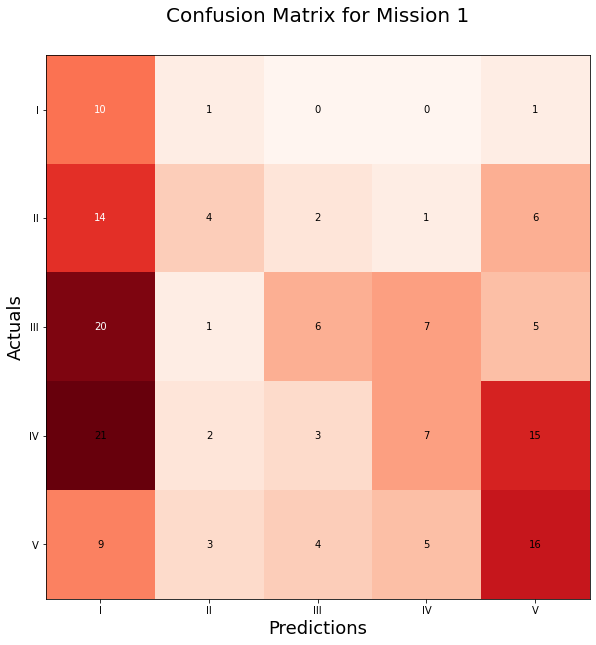

In [ ]:
nearest_means_classifier(dataset_train_m1, dataset_test_m1, "Mission 1")

Mission 2

Accuracy: 0.26380368098159507
Macro f1-score: 0.2567999749410724




<Figure size 432x288 with 0 Axes>

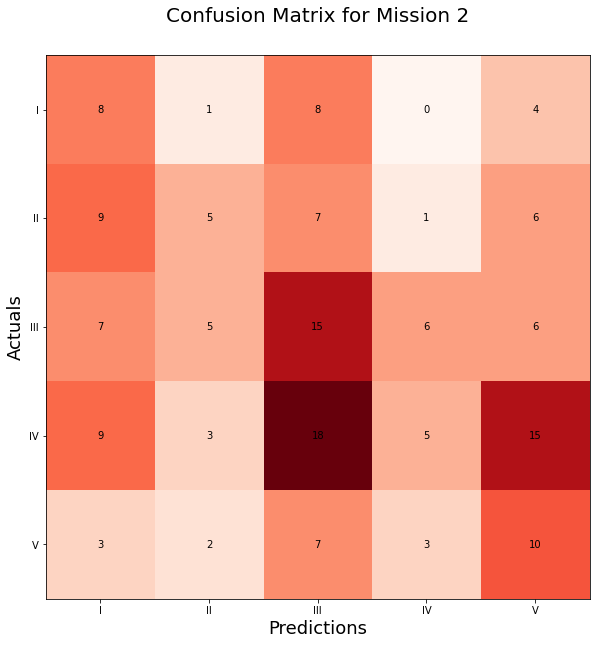

In [ ]:
nearest_means_classifier(dataset_train_m2, dataset_test_m2, "Mission 2")

Mission 3

Accuracy: 0.6012269938650306
Macro f1-score: 0.6150584274113686




<Figure size 432x288 with 0 Axes>

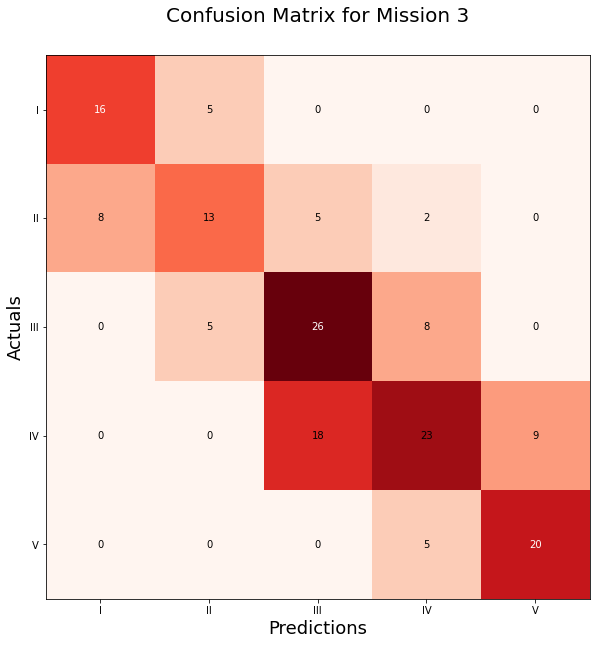

In [ ]:
nearest_means_classifier(dataset_train_m3, dataset_test_m3, "Mission 3")

Implemented Models with Feature Engineering:
---

Function for Mutual Information Classification Feature Selection Technique with Classification Model:

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
def MIC_classmodel(data_train,data_test,class_model,param,mission_name):
  X = data_train.iloc[:,:-1]
  y = data_train.iloc[:,-1]

  X_test_new = data_test.iloc[:,:-1]
  y_test_new = data_test.iloc[:,-1]

  mutual_info_features = MIC(X, y)
  mutual_info_features_plot = pd.Series(mutual_info_features, data_train.columns[0:len(data_train.columns)-1])

  mi_score_selected_index = np.where(mutual_info_features >param)[0]
  selected_feat = mi_score_selected_index.tolist()

  X_train_new = np.array(X.iloc[:,selected_feat])
  y_train_new = np.array(y)

  X_test_new = np.array(X_test_new.iloc[:,selected_feat])
  y_test_new = np.array(y_test_new)

  classifier = class_model
  classifier.fit(X_train_new, y_train_new)

  y_pred = classifier.predict(X_test_new)

  calc_metrics(y_test_new, y_pred, mission_name)

Function for Chi2 Feature Selection Technique with Classification Model:

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
def chi2_classmodel(data_train,data_test,class_model,param,mission_name):
  X = data_train.iloc[:,:-1]
  y = data_train.iloc[:,-1]

  X_test_new = data_test.iloc[:,:-1]
  y_test_new = data_test.iloc[:,-1]
  
  test = SelectKBest(score_func=chi2, k=param)
  fit = test.fit(X, y)
  X_train_new=test.fit_transform(X, y)

  X_test_new = test.transform(X_test_new)

  X_train_new = np.array(X_train_new)
  y_train_new = np.array(y)

  X_test_new = np.array(X_test_new)
  y_test_new = np.array(y_test_new)

  classifier = class_model
  classifier.fit(X_train_new, y_train_new)

  y_pred = classifier.predict(X_test_new)

  calc_metrics(y_test_new, y_pred, mission_name)


Function for Recursive Feature Elimination Feature Selection Technique with Classification Model:

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
def RFE_classmodel(data_train,data_test,class_model,param,mission_name):
  X = data_train.iloc[:,:-1]
  y = data_train.iloc[:,-1]

  X_test_new = data_test.iloc[:,:-1]
  y_test_new = data_test.iloc[:,-1]

  estimator = RandomForestClassifier()
  cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
  selector = RFECV(estimator, step=1,cv=cv_inner)
  selector = selector.fit(X, y)
  columns_req = data_train.iloc[:,:-1].columns[selector.get_support()]

  X_train_new = np.array(X.loc[:,columns_req])
  y_train_new = np.array(y)
  X_test_new = np.array(X_test_new.loc[:,columns_req])
  y_test_new = np.array(y_test_new)

  regressor = class_model
  regressor.fit(X_train_new, y_train_new)

  y_pred = regressor.predict(X_test_new)

  calc_metrics(y_test_new, y_pred, mission_name)

In [ ]:
dataset_train = pd.read_csv('student_performance_train.csv')
dataset_test = pd.read_csv('student_performance_test.csv')

dataset_train_m1 = dataset_train.drop(['G2','G3'],axis=1)
dataset_test_m1 = dataset_test.drop(['G2','G3'],axis=1)
convert_req_column(dataset_train_m1, "G1")
convert_req_column(dataset_test_m1, "G1")


dataset_train_m2 = dataset_train.drop(['G1','G2'],axis=1)
dataset_test_m2 = dataset_test.drop(['G1','G2'],axis=1)
convert_req_column(dataset_train_m2, "G3")
convert_req_column(dataset_test_m2, "G3")

dataset_train_m3 = dataset_train
dataset_test_m3 = dataset_test
convert_req_column(dataset_train_m3, "G3")
convert_req_column(dataset_test_m3, "G3")

label_encode(dataset_train_m1, labels)
label_encode(dataset_test_m1, labels)

label_encode(dataset_train_m2, labels)
label_encode(dataset_test_m2, labels)

label_encode(dataset_train_m3, labels)
label_encode(dataset_test_m3, labels)

#Working on Mission 1:

In [ ]:
mjobs = pd.get_dummies(dataset_train_m1.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_train_m1.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_train_m1.reason, prefix='reason')
guardian = pd.get_dummies(dataset_train_m1.guardian, prefix='guardian')
g1 = dataset_train_m1.iloc[:,-1]

dataset_train_m1 = dataset_train_m1.drop(['G1','Mjob','Fjob','reason','guardian'],axis=1)
dataset_train_m1 = pd.concat([dataset_train_m1, mjobs, fjobs, reason, guardian,g1], axis=1)

mjobs = pd.get_dummies(dataset_test_m1.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_test_m1.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_test_m1.reason, prefix='reason')
guardian = pd.get_dummies(dataset_test_m1.guardian, prefix='guardian')
g1 = dataset_test_m1.iloc[:,-1]

dataset_test_m1 = dataset_test_m1.drop(['G1','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m1 = pd.concat([dataset_test_m1, mjobs, fjobs, reason, guardian,g1], axis=1)

In [ ]:
scalar = StandardScaler()
m1_train_scale = dataset_train_m1.copy()
m1_test_scale = dataset_test_m1.copy()

m1_train_norm = dataset_train_m1.copy()
m1_test_norm = dataset_test_m1.copy()
# data1 = dataset_train_m1.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]]
m1_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.fit_transform(m1_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m1_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.transform(m1_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m1_test_scale

norm = MinMaxScaler()
m1_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.fit_transform(m1_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m1_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.transform(m1_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])

Bayes Classifier
---

In [ ]:
from sklearn.naive_bayes import GaussianNB

1. Mutual Info Classification:

Accuracy: 0.2392638036809816
Macro f1-score: 0.2247463690694577




<Figure size 432x288 with 0 Axes>

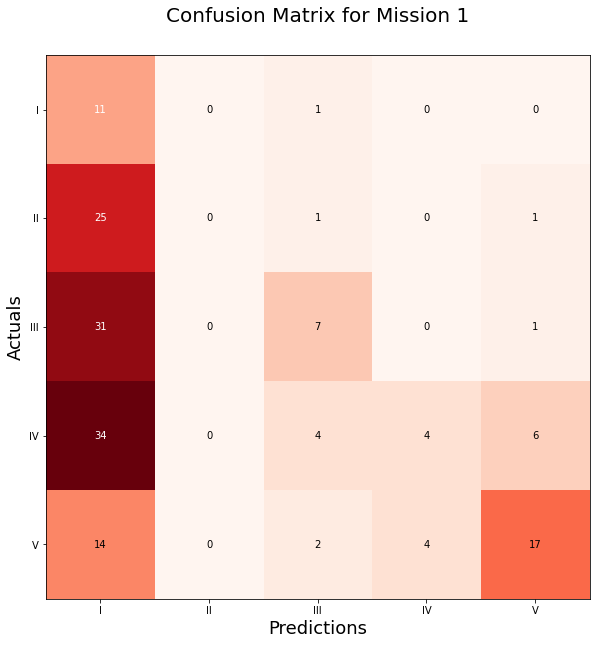

In [ ]:
MIC_classmodel(dataset_train_m1,dataset_test_m1,class_model = GaussianNB(),param= 0.01,mission_name= 'Mission 1')

2. Chi2 Feature Selection Technique:

Accuracy: 0.2331288343558282
Macro f1-score: 0.21618875329937426




<Figure size 432x288 with 0 Axes>

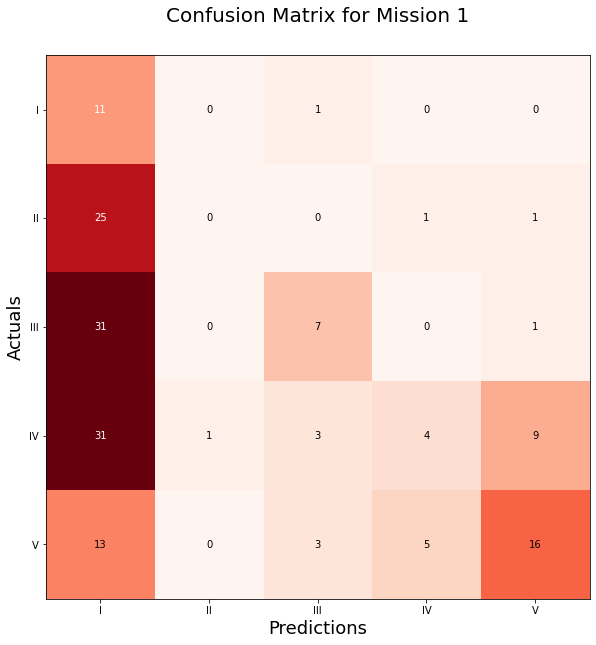

In [ ]:
chi2_classmodel(dataset_train_m1,dataset_test_m1,class_model=GaussianNB(),param = 20,mission_name='Mission 1')

3. Recursive Feature Elimination Technique:

Accuracy: 0.2085889570552147
Macro f1-score: 0.1768996960486322




<Figure size 432x288 with 0 Axes>

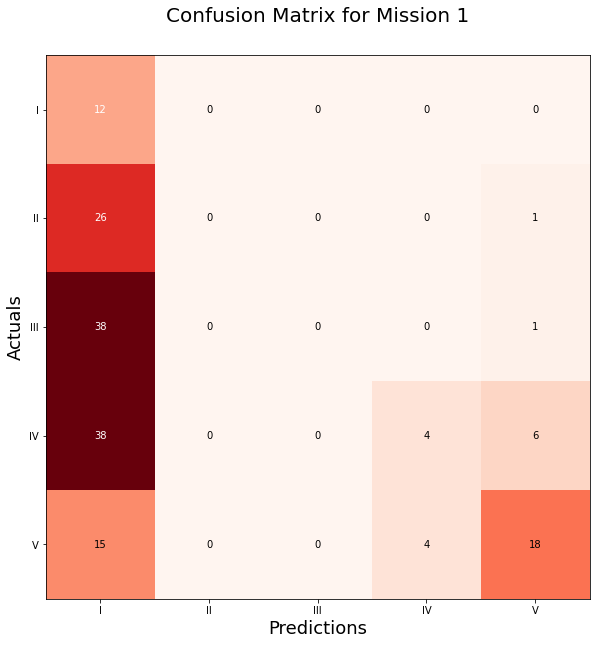

In [ ]:
RFE_classmodel(dataset_train_m1,dataset_test_m1,class_model=GaussianNB(),param = 20,mission_name='Mission 1')

SVM
---

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

1. Mutual Information Classification Feature Selection:

Accuracy: 0.4049079754601227
Macro f1-score: 0.30529331156540646




<Figure size 432x288 with 0 Axes>

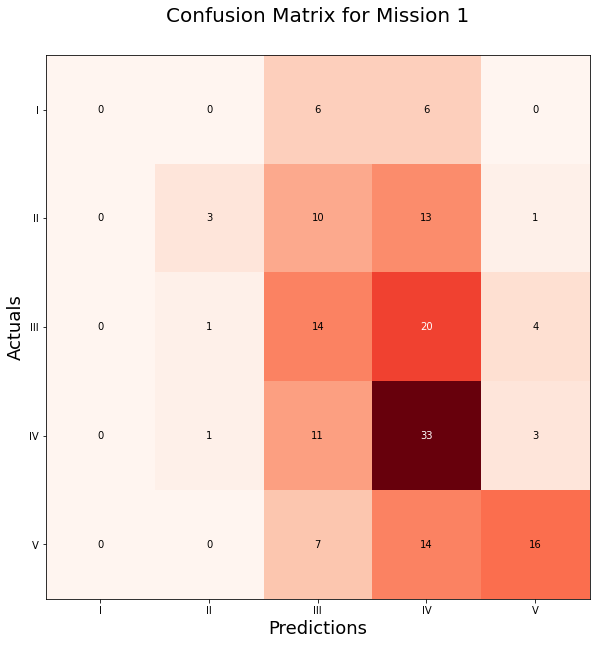

In [ ]:
MIC_classmodel(dataset_train_m1,dataset_test_m1,class_model = SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 1')

*  Standardization


Accuracy: 0.4110429447852761
Macro f1-score: 0.3047710887633742




<Figure size 432x288 with 0 Axes>

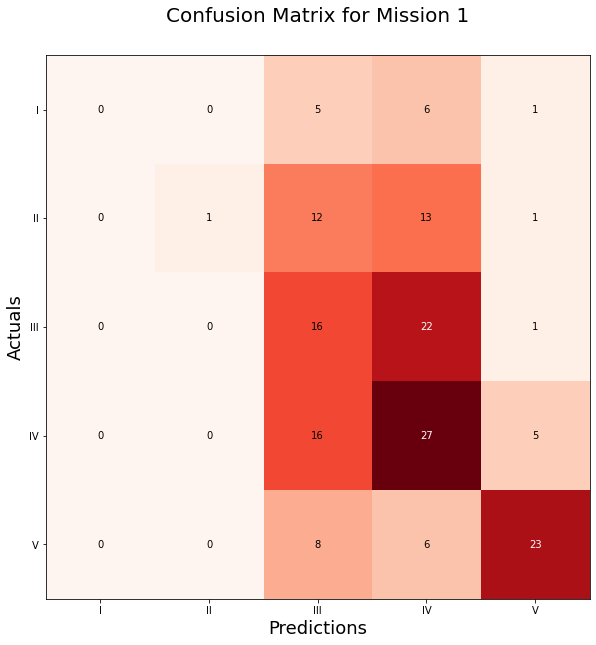

In [ ]:
MIC_classmodel(m1_train_scale,m1_test_scale,class_model = SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 1')

*  Normalization

Accuracy: 0.3619631901840491
Macro f1-score: 0.21418036750483557




<Figure size 432x288 with 0 Axes>

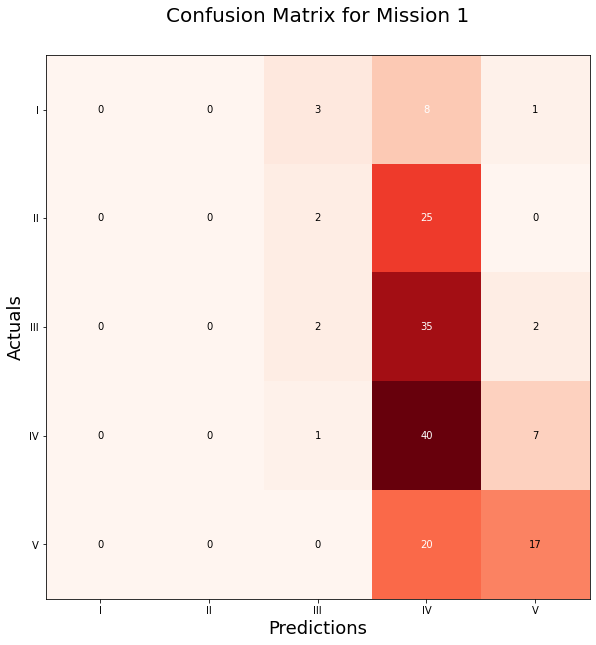

In [ ]:
MIC_classmodel(m1_train_norm,m1_test_norm,class_model = SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 1')

2. Chi2 Feature Selection

Accuracy: 0.3374233128834356
Macro f1-score: 0.26669456050735796




<Figure size 432x288 with 0 Axes>

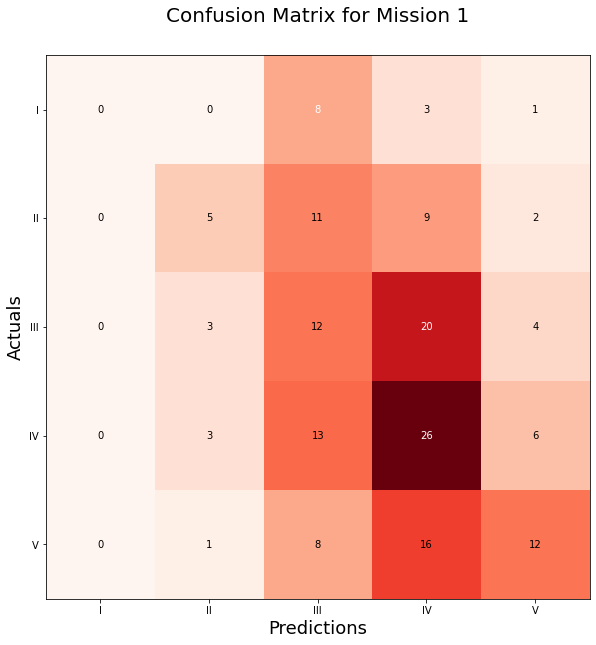

In [ ]:
chi2_classmodel(dataset_train_m1,dataset_test_m1,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 1')

*  Normalization

Accuracy: 0.34355828220858897
Macro f1-score: 0.22345383759733037




<Figure size 432x288 with 0 Axes>

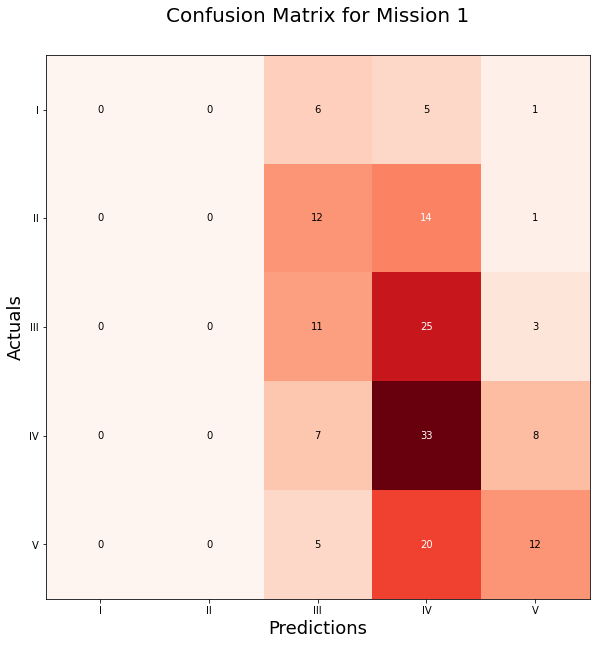

In [ ]:
chi2_classmodel(m1_train_norm,m1_test_norm,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 1')

3. Recursive Feature Elimination:

Accuracy: 0.38650306748466257
Macro f1-score: 0.2976608210650764




<Figure size 432x288 with 0 Axes>

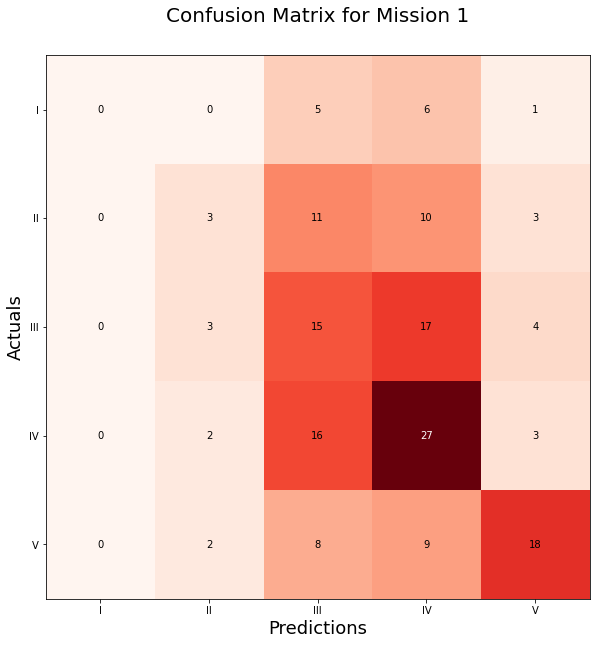

In [ ]:
RFE_classmodel(dataset_train_m1,dataset_test_m1,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 1')

*  Standardization


Accuracy: 0.4171779141104294
Macro f1-score: 0.3031924154277096




<Figure size 432x288 with 0 Axes>

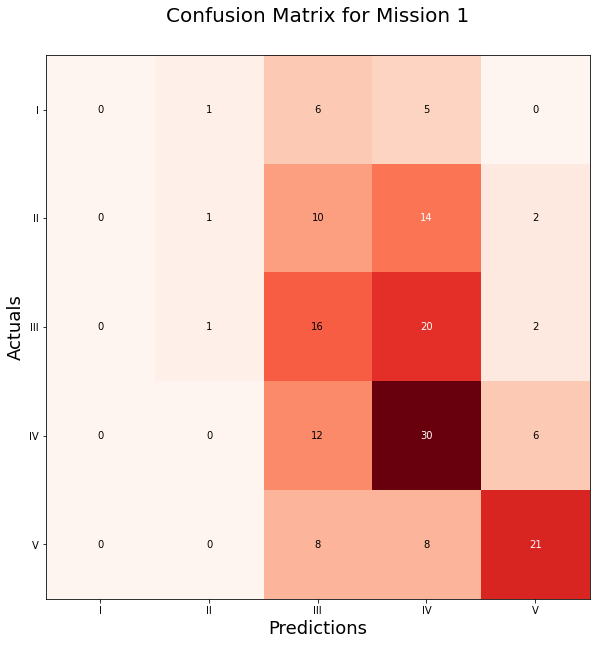

In [ ]:
RFE_classmodel(m1_train_scale,m1_test_scale,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 1')

*  Normalization

Accuracy: 0.3496932515337423
Macro f1-score: 0.22025335320417289




<Figure size 432x288 with 0 Axes>

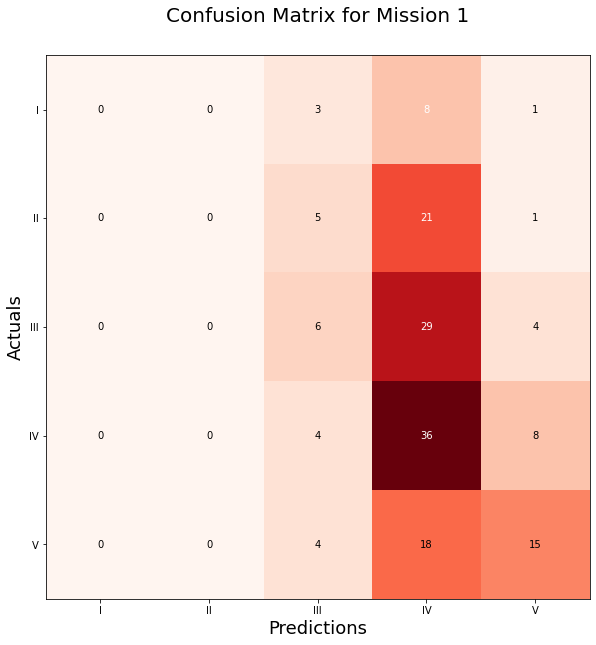

In [ ]:
RFE_classmodel(m1_train_norm,m1_test_norm,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 1')

ANN Classifier
---

In [ ]:
from sklearn.neural_network import MLPClassifier

1. Mutual Information Classification Feature Selection:

Accuracy: 0.3312883435582822
Macro f1-score: 0.3131303248950308




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

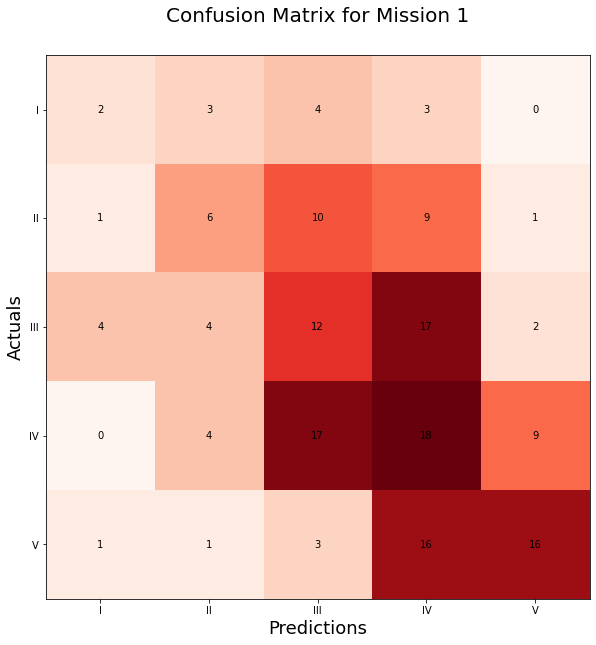

In [ ]:
MIC_classmodel(dataset_train_m1,dataset_test_m1,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 1')

*  Standardization


Accuracy: 0.3312883435582822
Macro f1-score: 0.2960475798711093




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

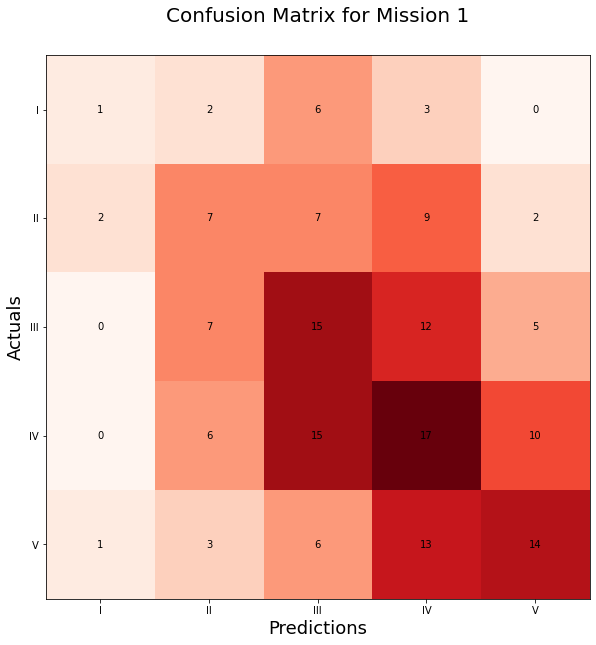

In [ ]:
MIC_classmodel(m1_train_scale,m1_test_scale,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 1')

*  Normalization

Accuracy: 0.31901840490797545
Macro f1-score: 0.2775231790012356




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

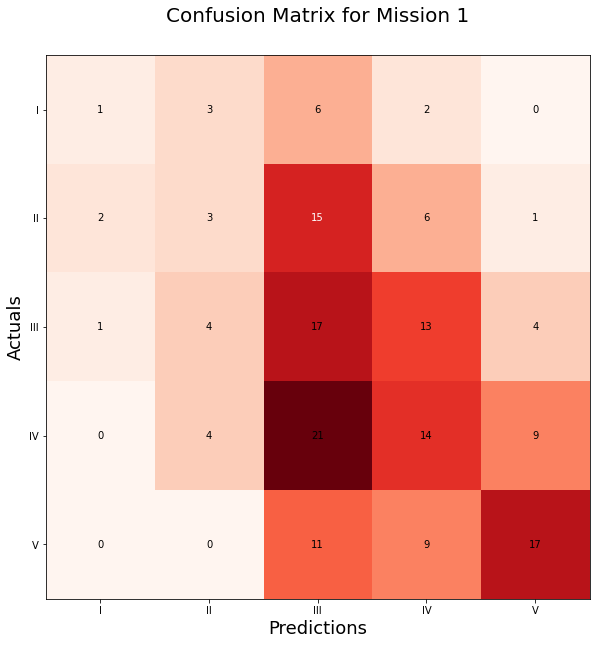

In [ ]:
MIC_classmodel(m1_train_norm,m1_test_norm,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 1')

2. Chi2 Feature Selection

Accuracy: 0.3374233128834356
Macro f1-score: 0.31693146132650735




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

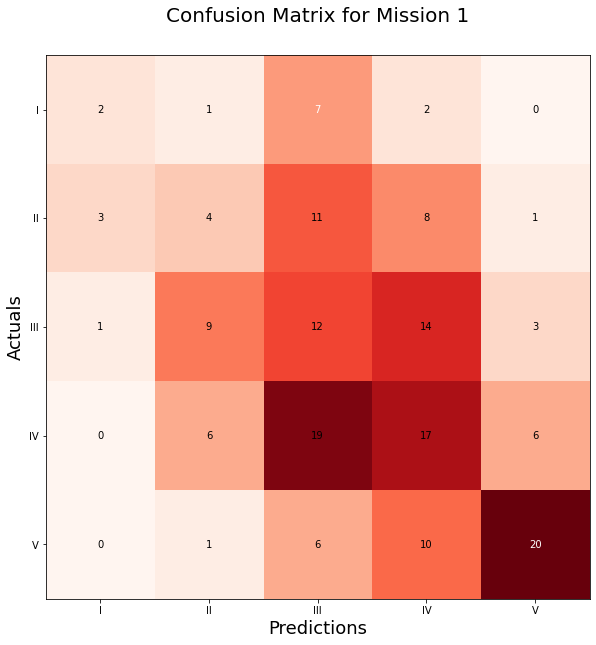

In [ ]:
chi2_classmodel(dataset_train_m1,dataset_test_m1,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 1')

*  Normalization

Accuracy: 0.4049079754601227
Macro f1-score: 0.3802730135847664




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

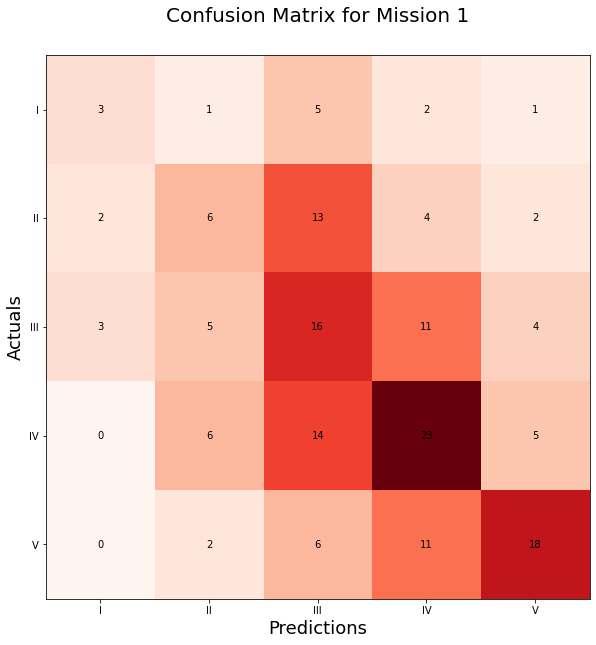

In [ ]:
chi2_classmodel(m1_train_norm,m1_test_norm,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 1')

3. Recursive Feature Elimination:

Accuracy: 0.36809815950920244
Macro f1-score: 0.3070099889012209




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

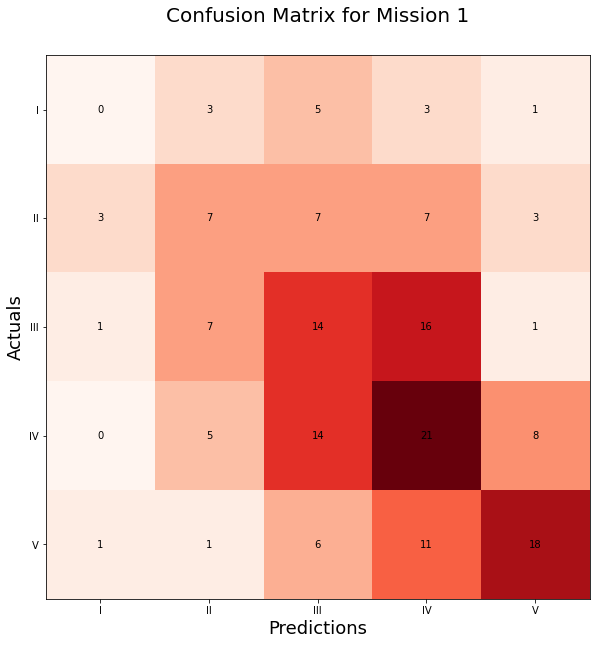

In [ ]:
RFE_classmodel(dataset_train_m1,dataset_test_m1,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 1')

*  Standardization


Accuracy: 0.3558282208588957
Macro f1-score: 0.3157055648525703




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

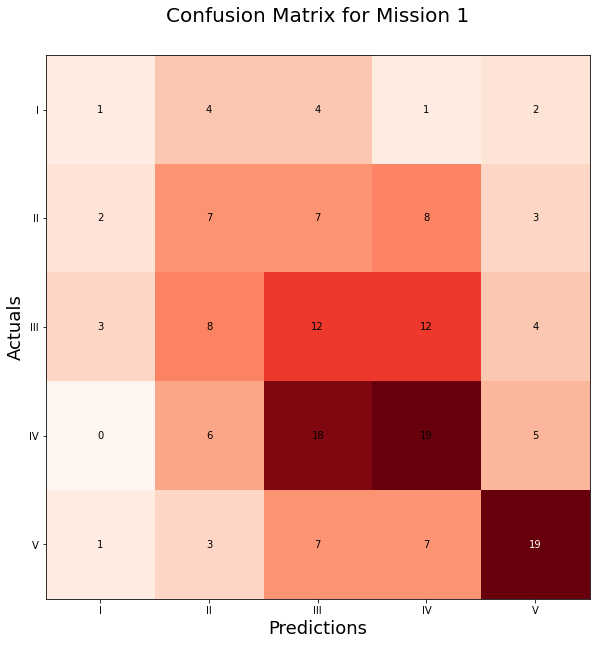

In [ ]:
RFE_classmodel(m1_train_scale,m1_test_scale,class_model= MLPClassifier(random_state=1, max_iter=300) ,param = 20,mission_name='Mission 1')

*  Normalization

Accuracy: 0.32515337423312884
Macro f1-score: 0.2784044168391994




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

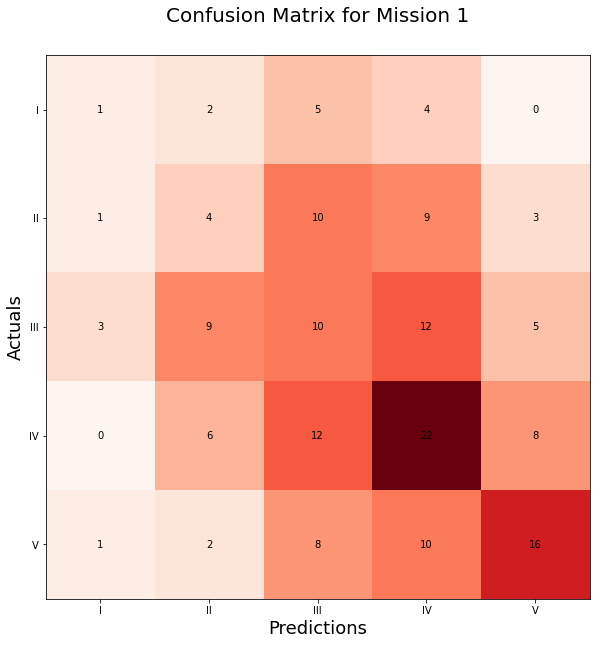

In [ ]:
RFE_classmodel(m1_train_norm,m1_test_norm,class_model= MLPClassifier(random_state=1, max_iter=300) ,param = 20,mission_name='Mission 1')

Random Forest Classifier
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

1. Mutual Information Classification Feature Selection:

Accuracy: 0.3803680981595092
Macro f1-score: 0.2293869187770728




<Figure size 432x288 with 0 Axes>

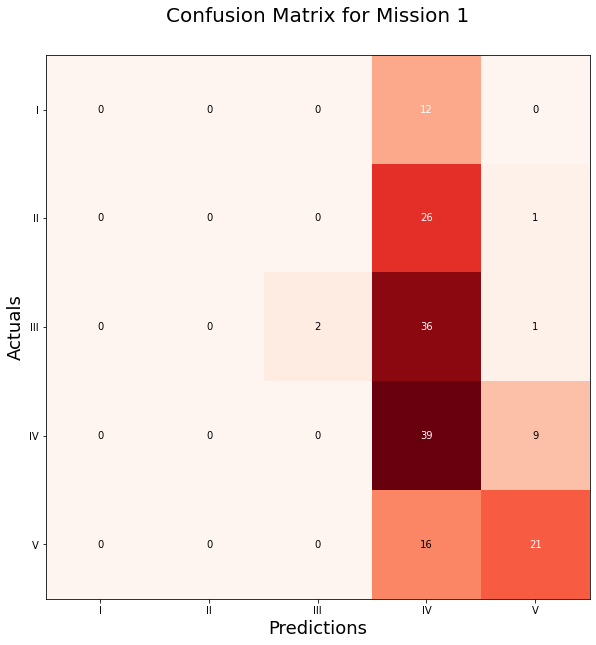

In [ ]:
MIC_classmodel(dataset_train_m1,dataset_test_m1,class_model = RandomForestClassifier(max_depth=2, random_state=0),param= 0.01,mission_name= 'Mission 1')

2. Chi2 Feature Selection

Accuracy: 0.3312883435582822
Macro f1-score: 0.20538944259874495




<Figure size 432x288 with 0 Axes>

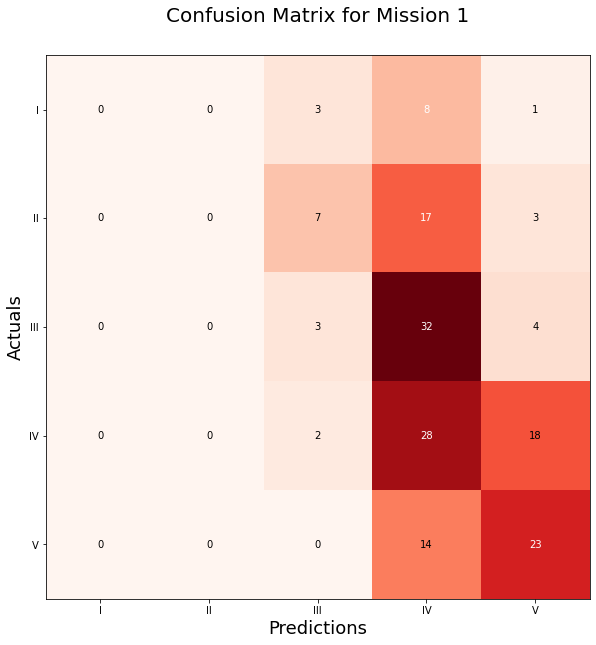

In [ ]:
chi2_classmodel(dataset_train_m1,dataset_test_m1,class_model=RandomForestClassifier(max_depth=2, random_state=0),param = 20,mission_name='Mission 1')

3. Recursive Feature Elimination:

Accuracy: 0.36809815950920244
Macro f1-score: 0.219247521408417




<Figure size 432x288 with 0 Axes>

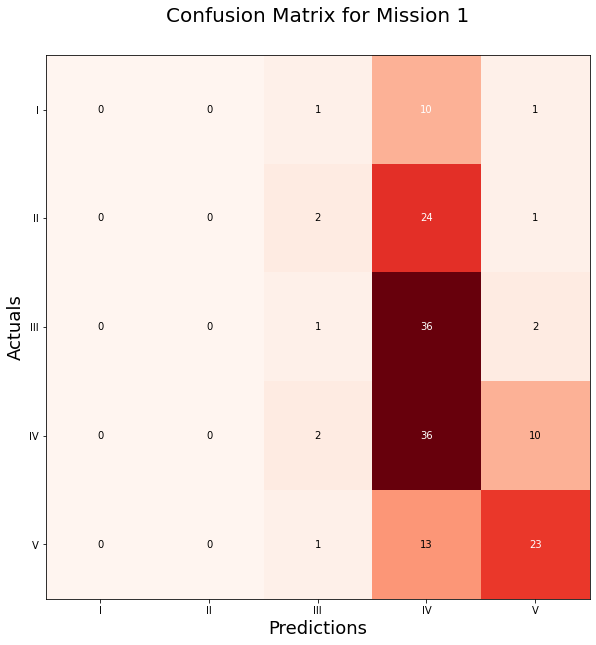

In [ ]:
RFE_classmodel(dataset_train_m1,dataset_test_m1,class_model=RandomForestClassifier(max_depth=2, random_state=0),param = 20,mission_name='Mission 1')

#Working on Mission 2:

In [ ]:
mjobs = pd.get_dummies(dataset_train_m2.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_train_m2.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_train_m2.reason, prefix='reason')
guardian = pd.get_dummies(dataset_train_m2.guardian, prefix='guardian')
g3 = dataset_train_m2.iloc[:,-1]

dataset_train_m2 = dataset_train_m2.drop(['G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_train_m2 = pd.concat([dataset_train_m2, mjobs, fjobs, reason, guardian,g3], axis=1)

mjobs = pd.get_dummies(dataset_test_m2.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_test_m2.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_test_m2.reason, prefix='reason')
guardian = pd.get_dummies(dataset_test_m2.guardian, prefix='guardian')
g3 = dataset_test_m2.iloc[:,-1]

dataset_test_m2 = dataset_test_m2.drop(['G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m2 = pd.concat([dataset_test_m2, mjobs, fjobs, reason, guardian,g3], axis=1)

In [ ]:
scalar = StandardScaler()
m2_train_scale = dataset_train_m2.copy()
m2_test_scale = dataset_test_m2.copy()

m2_train_norm = dataset_train_m2.copy()
m2_test_norm = dataset_test_m2.copy()
# data1 = dataset_train_m1.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]]
m2_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.fit_transform(m2_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m2_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.transform(m2_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m2_test_scale

norm = MinMaxScaler()
m2_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.fit_transform(m2_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m2_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.transform(m2_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])

Bayes Classifier
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.22699386503067484
Macro f1-score: 0.17795964979063572




<Figure size 432x288 with 0 Axes>

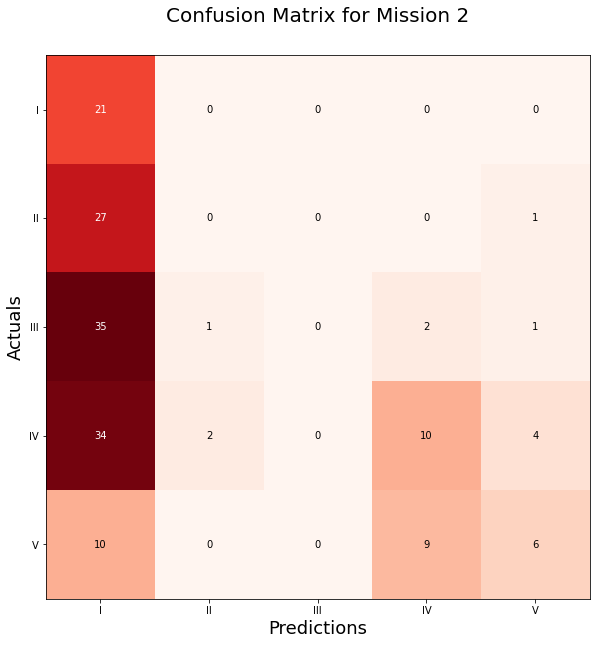

In [ ]:
MIC_classmodel(dataset_train_m2,dataset_test_m2,class_model = GaussianNB(),param= 0.01,mission_name= 'Mission 2')

2. Chi2 Feature Selection

Accuracy: 0.25153374233128833
Macro f1-score: 0.21716283716283719




<Figure size 432x288 with 0 Axes>

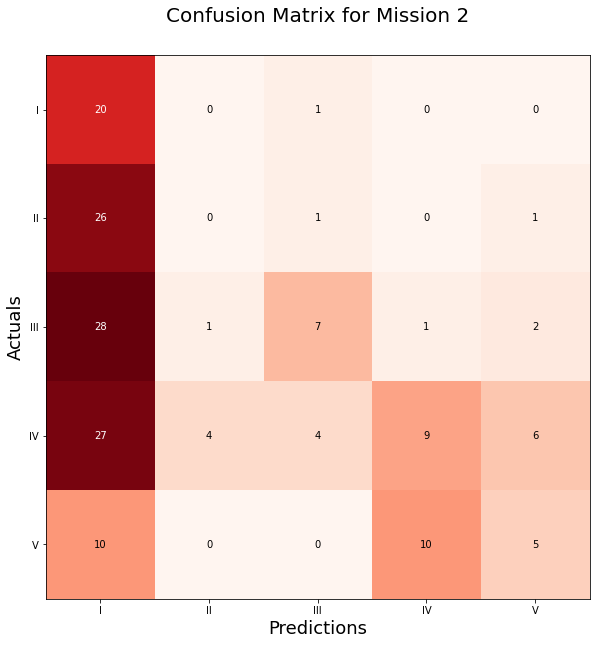

In [ ]:
chi2_classmodel(dataset_train_m2,dataset_test_m2,class_model=GaussianNB(),param = 20,mission_name='Mission 2')

3. Recursive Feature Elimination:

Accuracy: 0.31901840490797545
Macro f1-score: 0.3214558550693004




<Figure size 432x288 with 0 Axes>

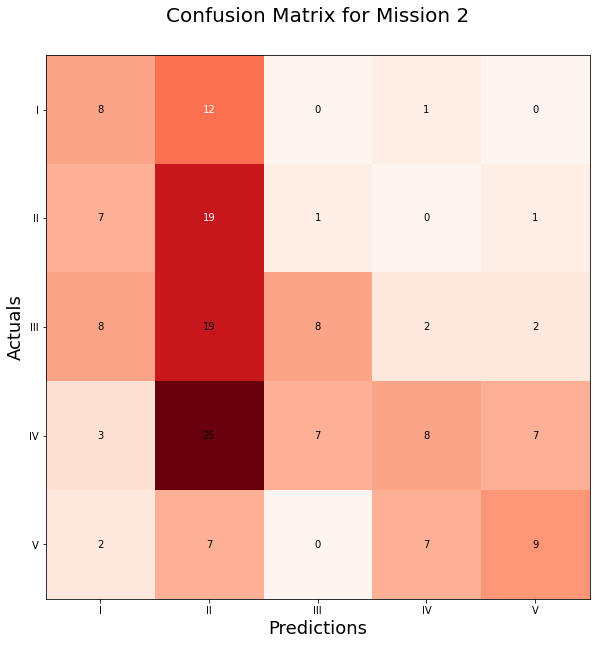

In [ ]:
RFE_classmodel(dataset_train_m2,dataset_test_m2,class_model=GaussianNB(),param = 20,mission_name='Mission 2')

SVM 
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.26380368098159507
Macro f1-score: 0.19268712464006582




<Figure size 432x288 with 0 Axes>

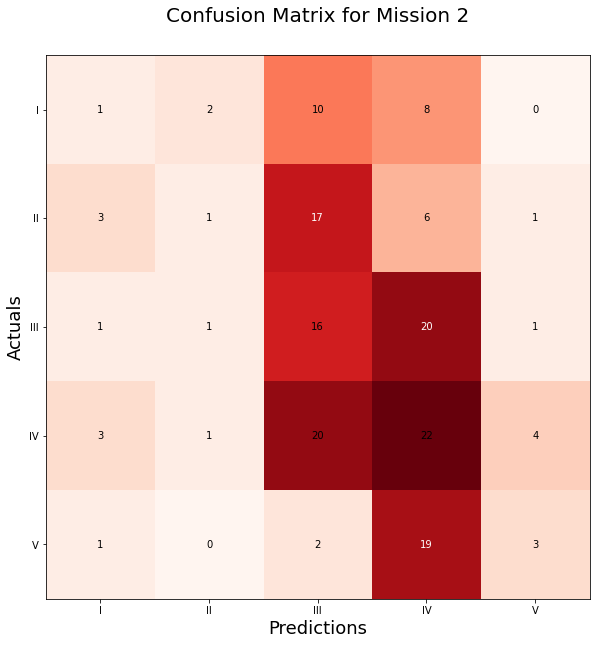

In [ ]:
MIC_classmodel(dataset_train_m2,dataset_test_m2,class_model =SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 2')

*  Standardization


Accuracy: 0.2883435582822086
Macro f1-score: 0.20178855412500277




<Figure size 432x288 with 0 Axes>

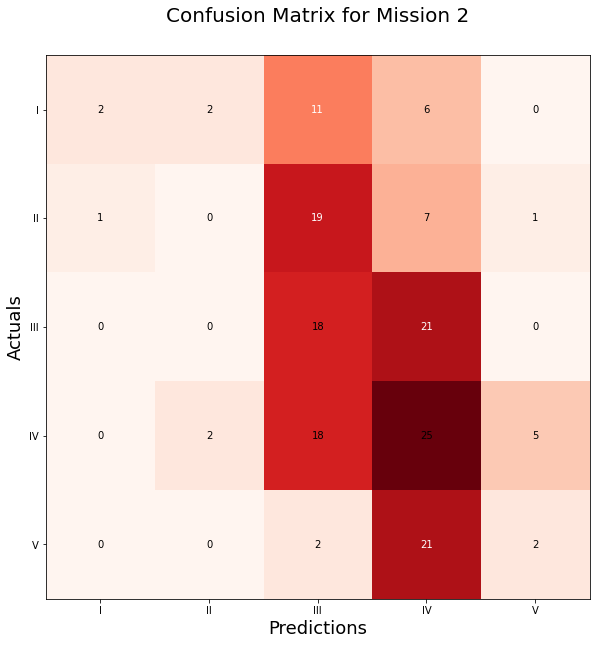

In [ ]:
MIC_classmodel(m2_train_scale,m2_test_scale,class_model =SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 2')

*  Normalization

Accuracy: 0.34355828220858897
Macro f1-score: 0.1771500630517024




<Figure size 432x288 with 0 Axes>

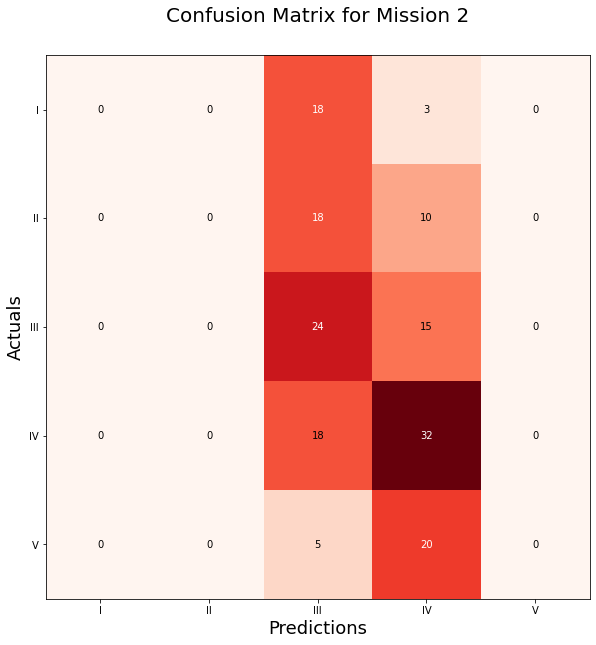

In [ ]:
MIC_classmodel(m2_train_norm,m2_test_norm,class_model =SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 2')

2. Chi2 Feature Selection

Accuracy: 0.3374233128834356
Macro f1-score: 0.24999113036496215




<Figure size 432x288 with 0 Axes>

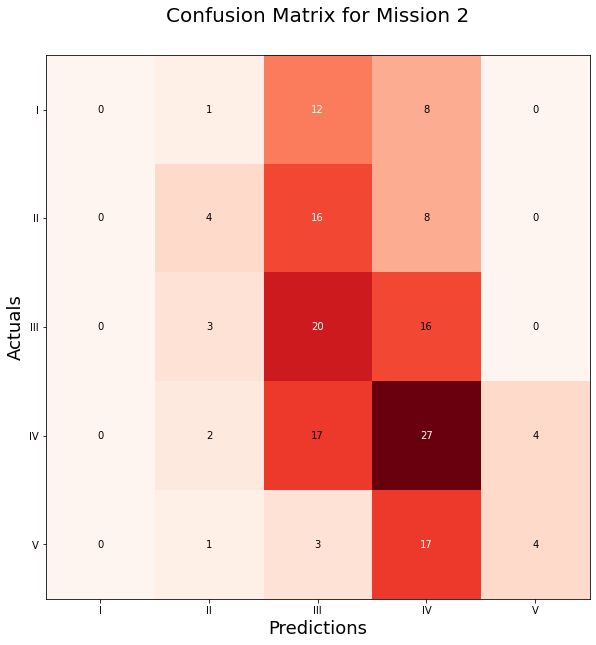

In [ ]:
chi2_classmodel(dataset_train_m2,dataset_test_m2,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 2')

*  Normalization

Accuracy: 0.3128834355828221
Macro f1-score: 0.16159274193548387




<Figure size 432x288 with 0 Axes>

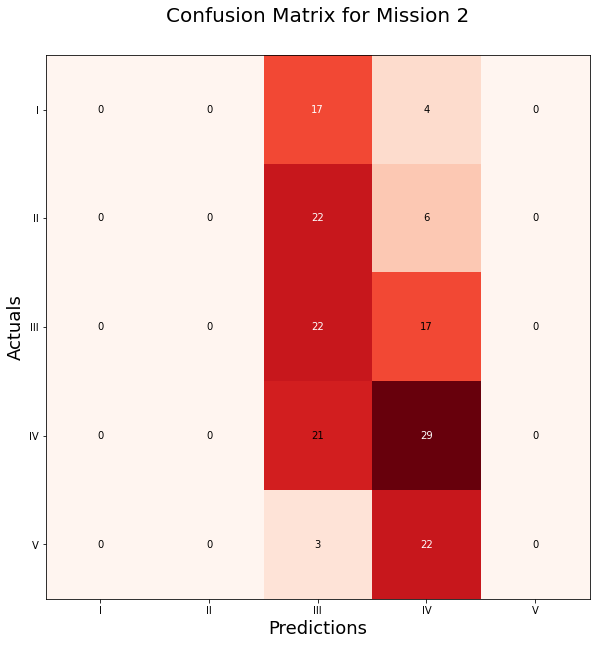

In [ ]:
chi2_classmodel(m2_train_norm,m2_test_norm,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 2')

3. Recursive Feature Elimination:

Accuracy: 0.2822085889570552
Macro f1-score: 0.21383078329643218




<Figure size 432x288 with 0 Axes>

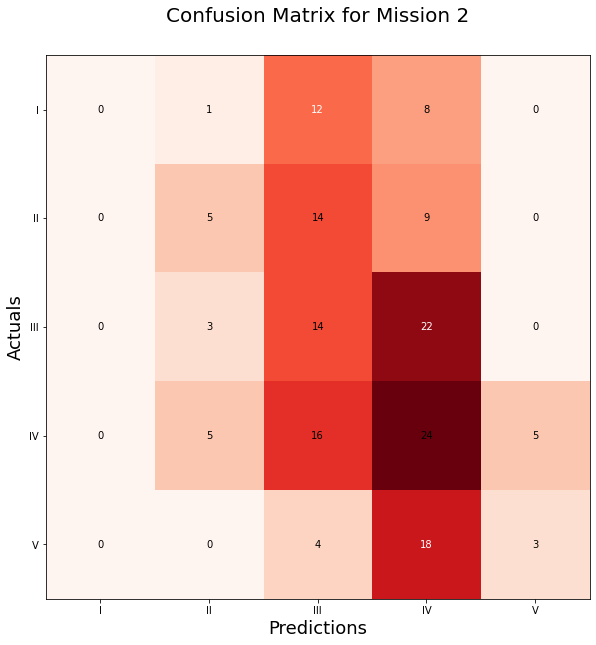

In [ ]:
RFE_classmodel(dataset_train_m2,dataset_test_m2,class_model= SVC(gamma='auto') ,param = 20,mission_name='Mission 2')

*  Standardization


Accuracy: 0.32515337423312884
Macro f1-score: 0.22599652370283438




<Figure size 432x288 with 0 Axes>

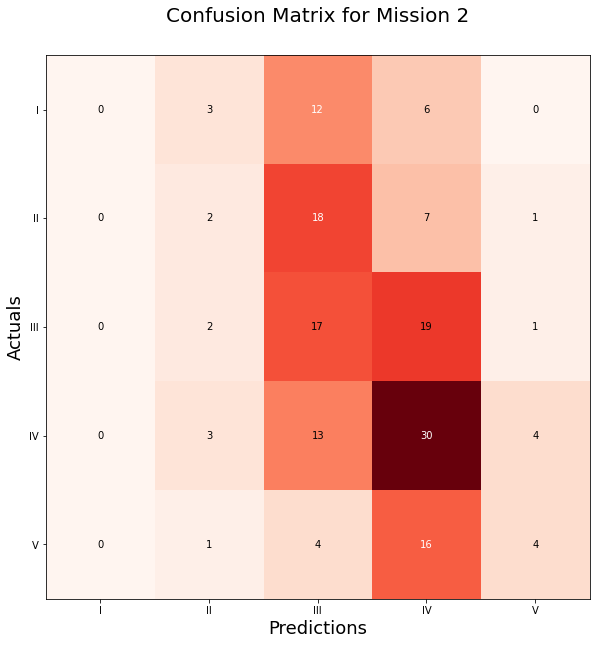

In [ ]:
RFE_classmodel(m2_train_scale,m2_test_scale,class_model= SVC(gamma='auto') ,param = 20,mission_name='Mission 2')

*  Normalization

Accuracy: 0.3067484662576687
Macro f1-score: 0.1578787878787879




<Figure size 432x288 with 0 Axes>

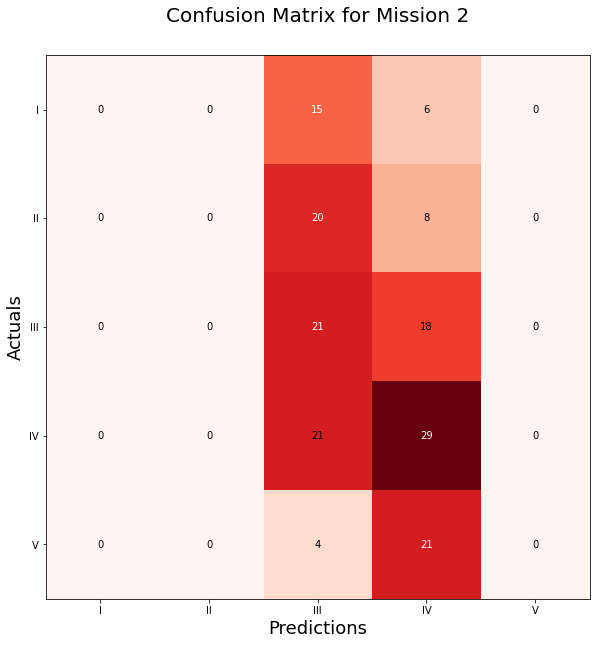

In [ ]:
RFE_classmodel(m2_train_norm,m2_test_norm,class_model= SVC(gamma='auto') ,param = 20,mission_name='Mission 2')

ANN Classifier 
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.3312883435582822
Macro f1-score: 0.3204259120535534




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

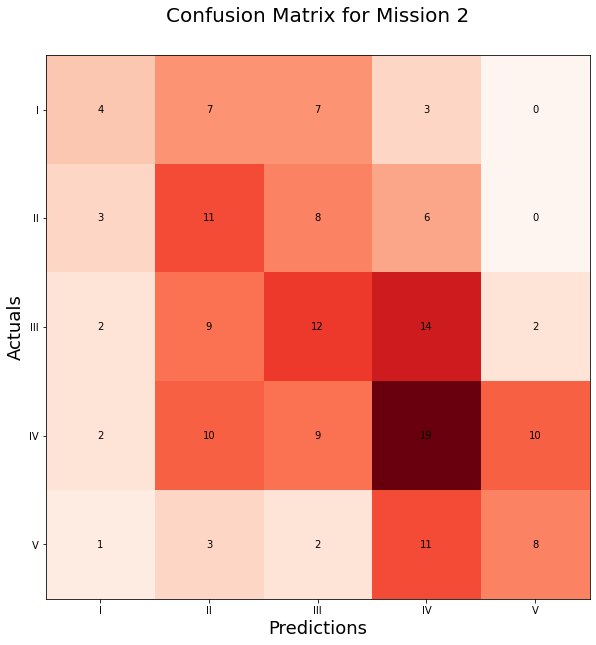

In [ ]:
MIC_classmodel(dataset_train_m2,dataset_test_m2,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 2')

*  Standardization


Accuracy: 0.294478527607362
Macro f1-score: 0.2821898413072975




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

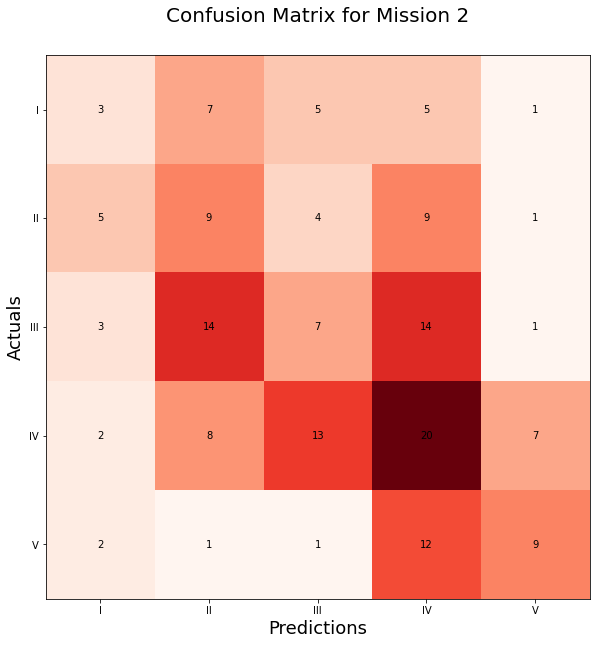

In [ ]:
MIC_classmodel(m2_train_scale,m2_test_scale,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 2')

*  Normalization

Accuracy: 0.3128834355828221
Macro f1-score: 0.2944309067298144




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

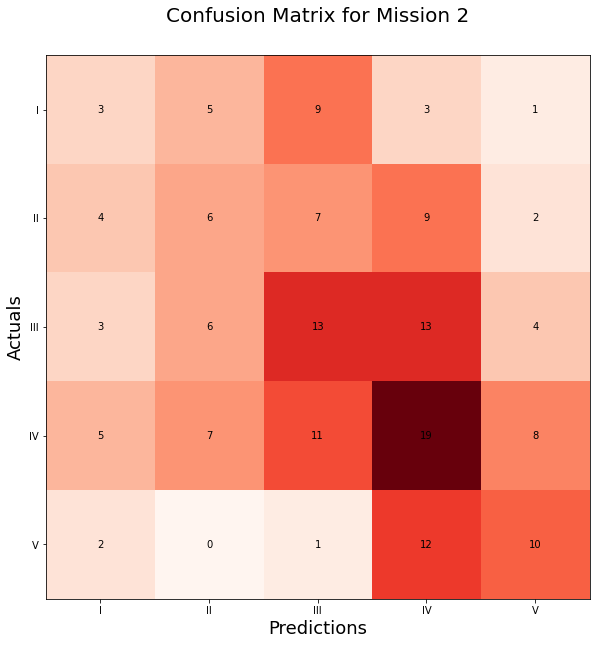

In [ ]:
MIC_classmodel(m2_train_norm,m2_test_norm,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 2')

2. Chi2 Feature Selection

Accuracy: 0.3312883435582822
Macro f1-score: 0.3168274104063578




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

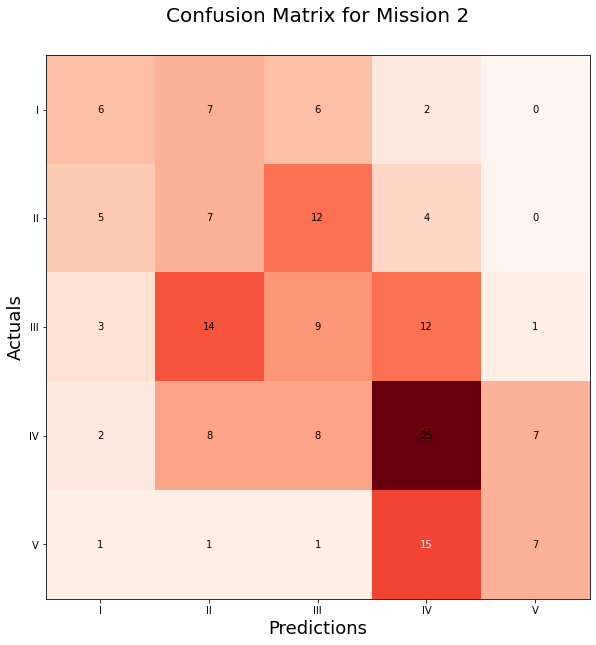

In [ ]:
chi2_classmodel(dataset_train_m2,dataset_test_m2,class_model=MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 2')

*  Normalization

Accuracy: 0.3312883435582822
Macro f1-score: 0.29410807583221377




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

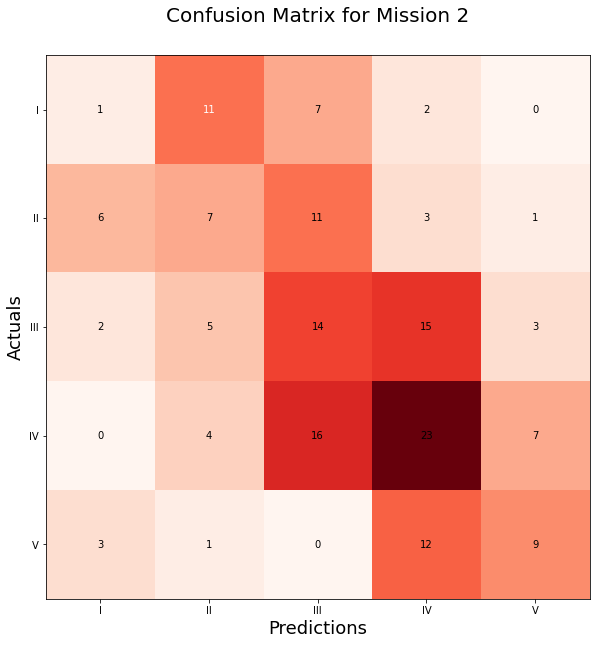

In [ ]:
chi2_classmodel(m2_train_norm,m2_test_norm,class_model=MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 2')

3. Recursive Feature Elimination:

Accuracy: 0.31901840490797545
Macro f1-score: 0.29707637512032065




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

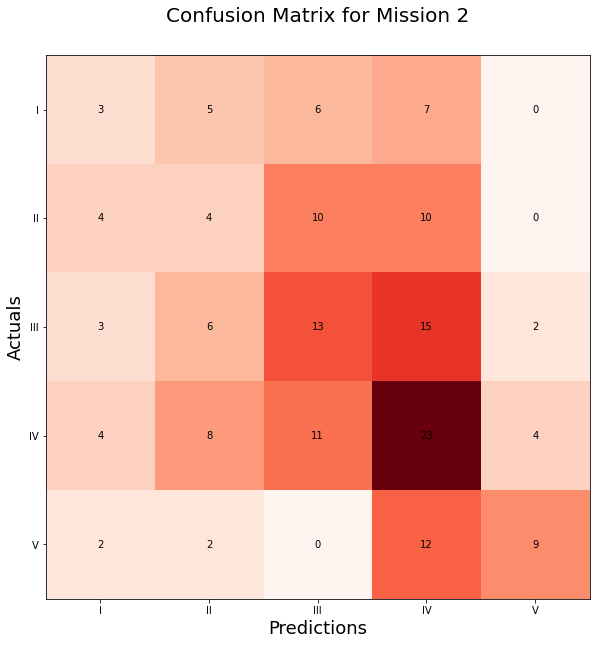

In [ ]:
RFE_classmodel(dataset_train_m2,dataset_test_m2,class_model=MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 2')

*  Standardization


Accuracy: 0.3067484662576687
Macro f1-score: 0.30521732026143794




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

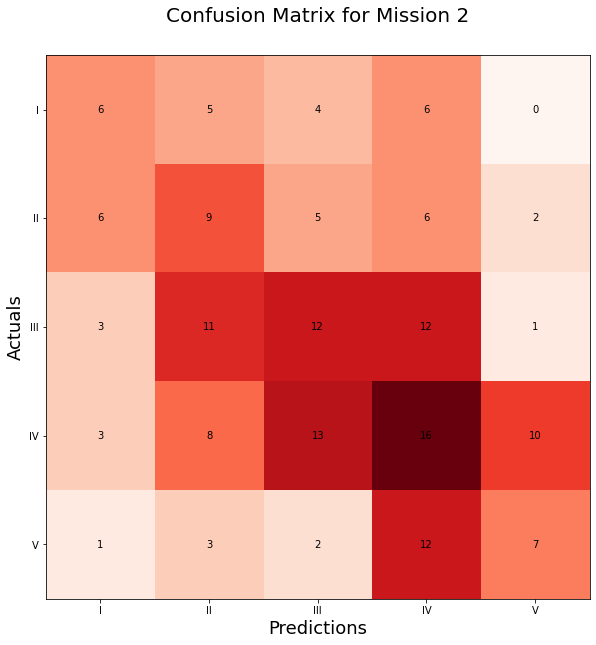

In [ ]:
RFE_classmodel(m2_train_scale,m2_test_scale,class_model=MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 2')

*  Normalization

Accuracy: 0.38650306748466257
Macro f1-score: 0.3659370170292278




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

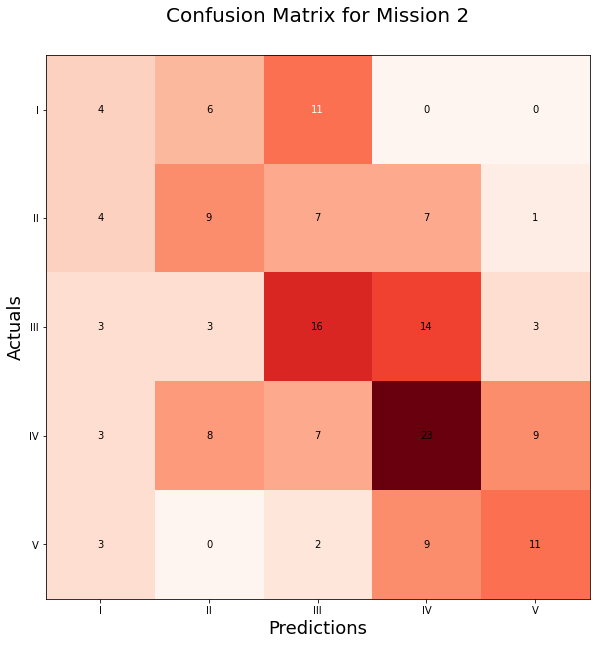

In [ ]:
RFE_classmodel(m2_train_norm,m2_test_norm,class_model=MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 2')

Random Forest Classifier
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.3312883435582822
Macro f1-score: 0.155622009569378




<Figure size 432x288 with 0 Axes>

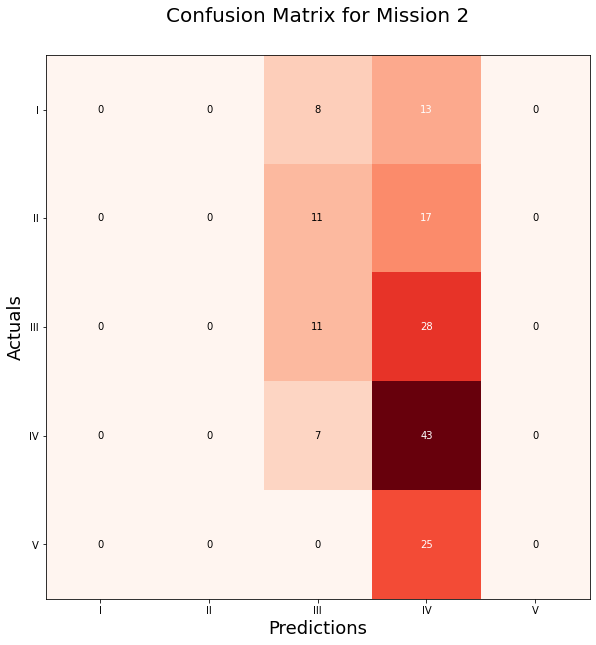

In [ ]:
MIC_classmodel(dataset_train_m2,dataset_test_m2,class_model = RandomForestClassifier(max_depth=2, random_state=0),param= 0.01,mission_name= 'Mission 2')

2. Chi2 Feature Selection

Accuracy: 0.3128834355828221
Macro f1-score: 0.15356536310319058




<Figure size 432x288 with 0 Axes>

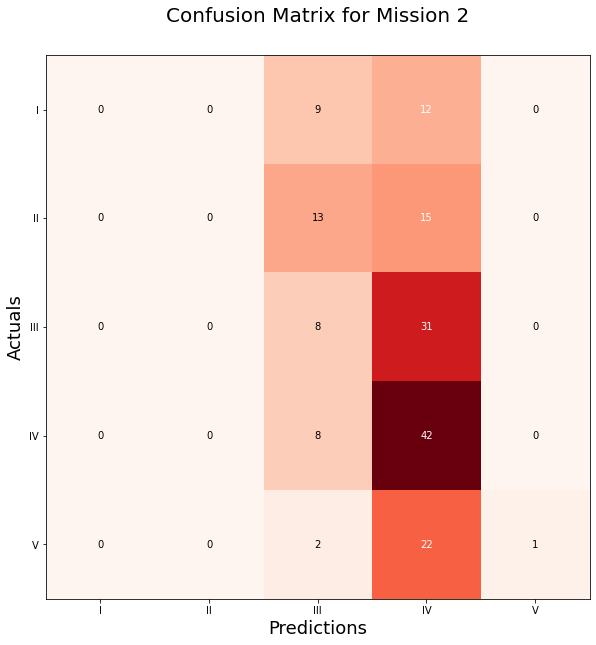

In [ ]:
chi2_classmodel(dataset_train_m2,dataset_test_m2,class_model=RandomForestClassifier(max_depth=2, random_state=0),param = 20,mission_name='Mission 2')

3. Recursive Feature Elimination:

Accuracy: 0.3374233128834356
Macro f1-score: 0.15272036113090995




<Figure size 432x288 with 0 Axes>

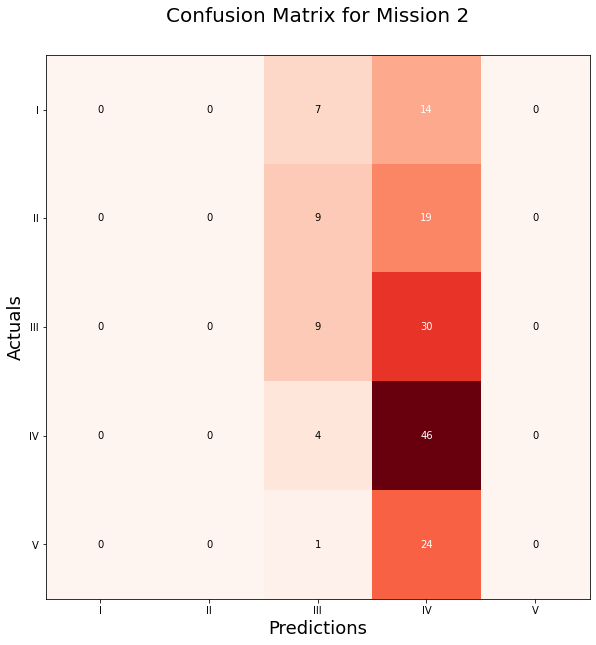

In [ ]:
RFE_classmodel(dataset_train_m2,dataset_test_m2,class_model=RandomForestClassifier(max_depth=2, random_state=0),param = 20,mission_name='Mission 2')

#Working on Mission 3:

In [ ]:
mjobs = pd.get_dummies(dataset_train_m3.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_train_m3.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_train_m3.reason, prefix='reason')
guardian = pd.get_dummies(dataset_train_m3.guardian, prefix='guardian')
g3 = dataset_train_m3.iloc[:,-1]
g2 = dataset_train_m3.iloc[:,-2]
g1 = dataset_train_m3.iloc[:,-3]

dataset_train_m3 = dataset_train_m3.drop(['G1','G2','G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_train_m3 = pd.concat([dataset_train_m3, mjobs, fjobs, reason, guardian,g1,g2,g3], axis=1)


mjobs = pd.get_dummies(dataset_test_m3.Mjob, prefix='Mjob')
fjobs = pd.get_dummies(dataset_test_m3.Fjob, prefix='Fjob')
reason = pd.get_dummies(dataset_test_m3.reason, prefix='reason')
guardian = pd.get_dummies(dataset_test_m3.guardian, prefix='guardian')
g3 = dataset_test_m3.iloc[:,-1]
g2 = dataset_test_m3.iloc[:,-2]
g1 = dataset_test_m3.iloc[:,-3]

dataset_test_m3 = dataset_test_m3.drop(['G1','G2','G3','Mjob','Fjob','reason','guardian'],axis=1)
dataset_test_m3 = pd.concat([dataset_test_m3, mjobs, fjobs, reason, guardian,g1,g2,g3], axis=1)

In [ ]:
scalar = StandardScaler()
m3_train_scale = dataset_train_m3.copy()
m3_test_scale = dataset_test_m3.copy()

m3_train_norm = dataset_train_m3.copy()
m3_test_norm = dataset_test_m3.copy()
# data1 = dataset_train_m1.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]]
m3_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.fit_transform(m3_train_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m3_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = scalar.transform(m3_test_scale.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m3_test_scale

norm = MinMaxScaler()
m3_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.fit_transform(m3_train_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])
m3_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]] = norm.transform(m3_test_norm.iloc[:,[2,6,7,8,9,10,19,20,21,22,23,24,25]])

Bayes Classifier
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.50920245398773
Macro f1-score: 0.5200670451893911




<Figure size 432x288 with 0 Axes>

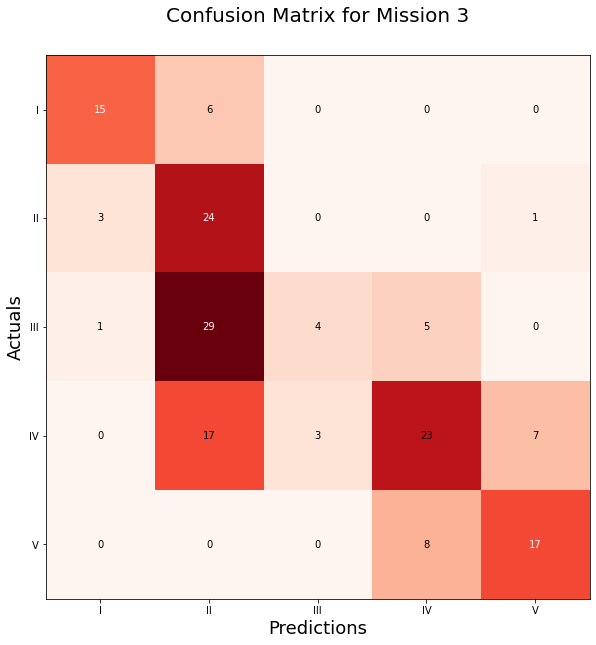

In [ ]:
MIC_classmodel(dataset_train_m3,dataset_test_m3,class_model = GaussianNB(),param= 0.01,mission_name= 'Mission 3')

2. Chi2 Feature Selection

Accuracy: 0.4294478527607362
Macro f1-score: 0.4167814652141028




<Figure size 432x288 with 0 Axes>

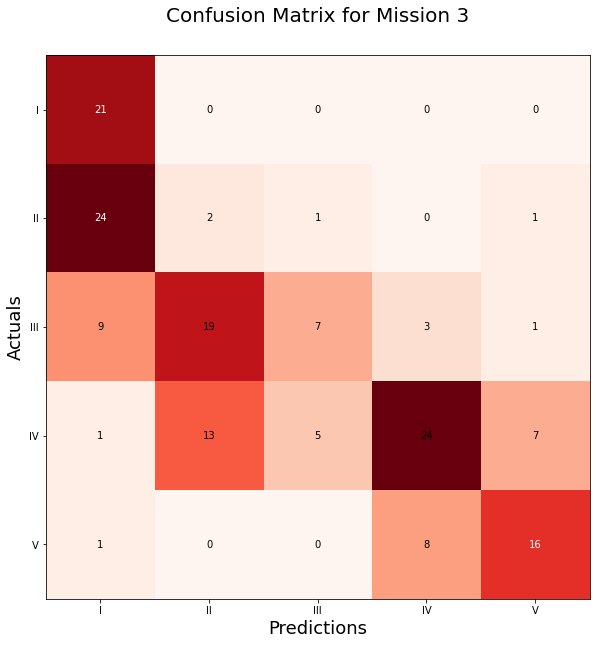

In [ ]:
chi2_classmodel(dataset_train_m3,dataset_test_m3,class_model=GaussianNB(),param = 20,mission_name='Mission 3')

3. Recursive Feature Elimination:

Accuracy: 0.7730061349693251
Macro f1-score: 0.7622862582294632




<Figure size 432x288 with 0 Axes>

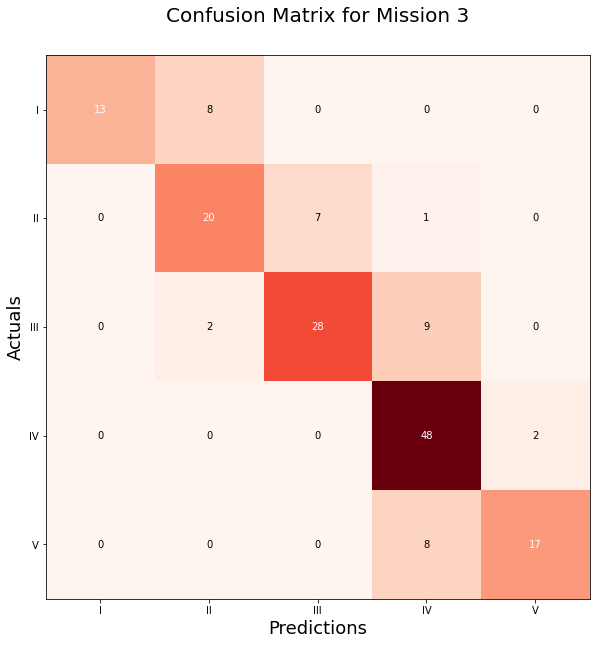

In [ ]:
RFE_classmodel(dataset_train_m3,dataset_test_m3,class_model=GaussianNB(),param = 20,mission_name='Mission 3')

SVM
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.6871165644171779
Macro f1-score: 0.6849731474816221




<Figure size 432x288 with 0 Axes>

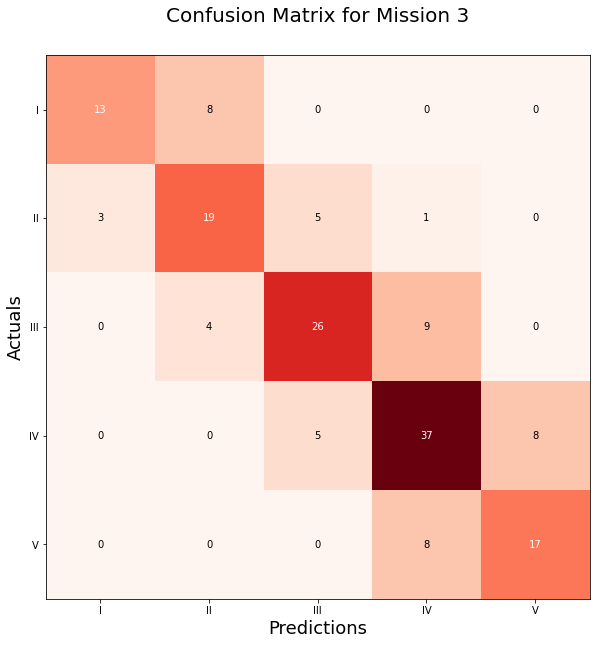

In [ ]:
MIC_classmodel(dataset_train_m3,dataset_test_m3,class_model =SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 3')

*  Standardization


Accuracy: 0.7177914110429447
Macro f1-score: 0.7138500120178037




<Figure size 432x288 with 0 Axes>

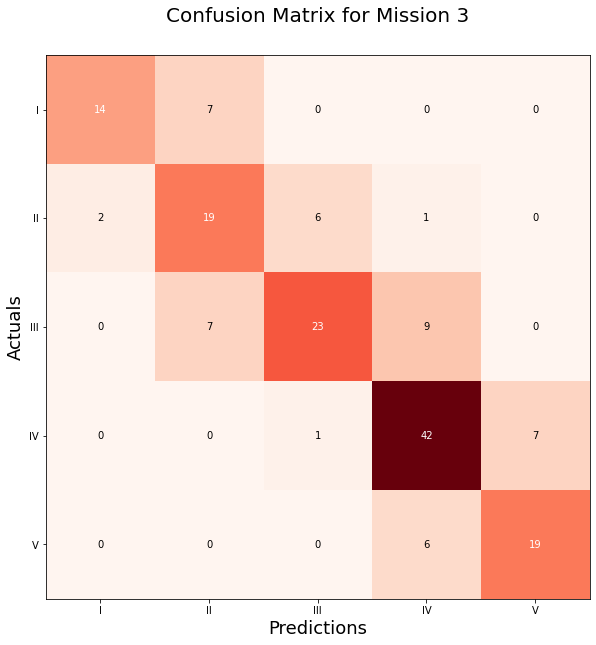

In [ ]:
MIC_classmodel(m3_train_scale,m3_test_scale,class_model =SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 3')

*  Normalization

Accuracy: 0.7730061349693251
Macro f1-score: 0.7627591706539075




<Figure size 432x288 with 0 Axes>

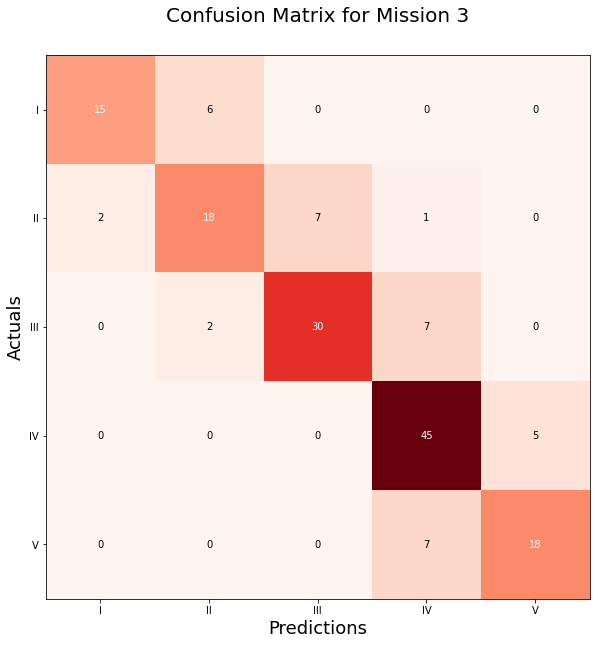

In [ ]:
MIC_classmodel(m3_train_norm,m3_test_norm,class_model =SVC(gamma='auto'),param= 0.01,mission_name= 'Mission 3')

2. Chi2 Feature Selection

Accuracy: 0.7239263803680982
Macro f1-score: 0.7277480311120865




<Figure size 432x288 with 0 Axes>

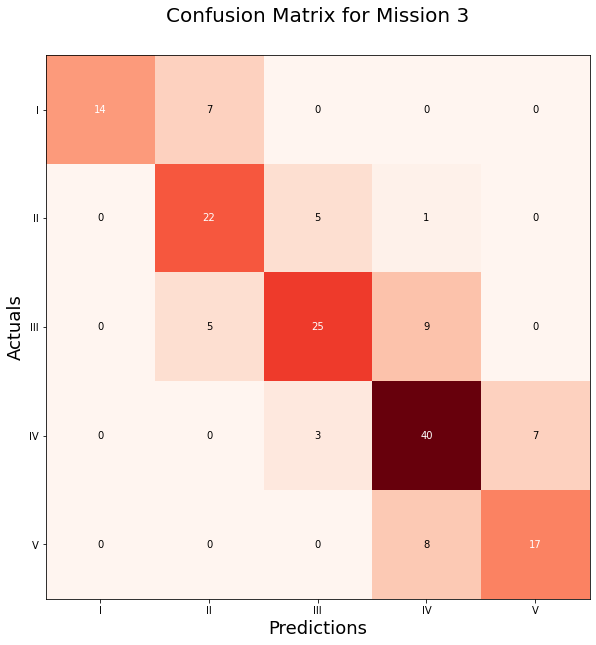

In [ ]:
chi2_classmodel(dataset_train_m3,dataset_test_m3,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 3')

*  Normalization

Accuracy: 0.754601226993865
Macro f1-score: 0.7465735330551481




<Figure size 432x288 with 0 Axes>

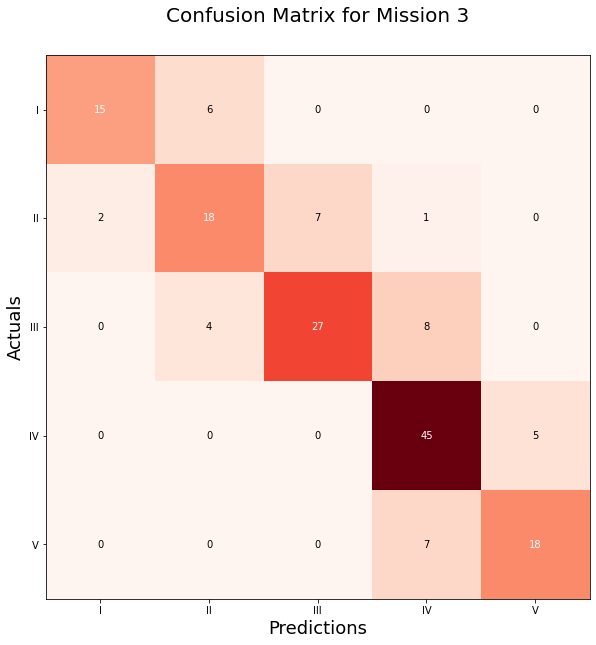

In [ ]:
chi2_classmodel(m3_train_norm,m3_test_norm,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 3')

3. Recursive Feature Elimination:

Accuracy: 0.7730061349693251
Macro f1-score: 0.7622862582294632




<Figure size 432x288 with 0 Axes>

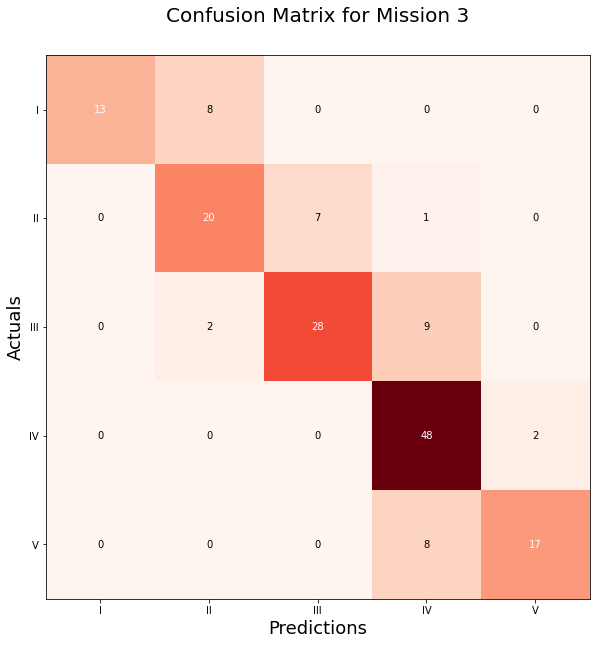

In [ ]:
RFE_classmodel(dataset_train_m3,dataset_test_m3,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 3')

*  Standardization


Accuracy: 0.7730061349693251
Macro f1-score: 0.7622862582294632




<Figure size 432x288 with 0 Axes>

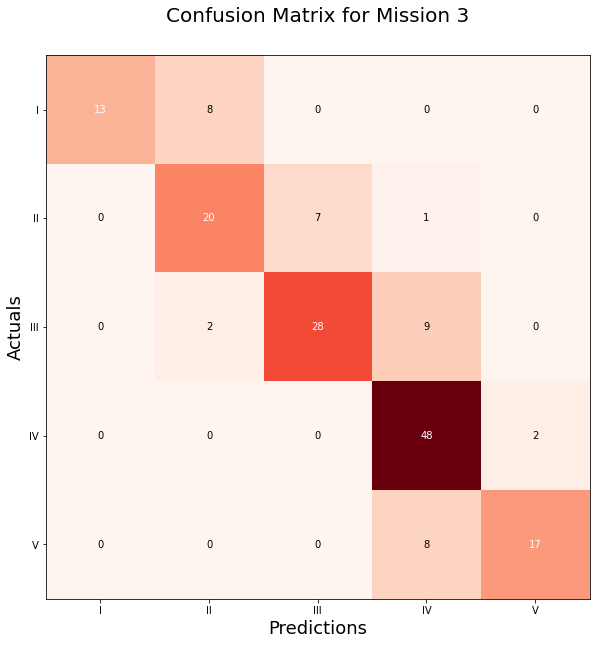

In [ ]:
RFE_classmodel(m3_train_scale,m3_test_scale,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 3')

*  Normalization

Accuracy: 0.7730061349693251
Macro f1-score: 0.7622862582294632




<Figure size 432x288 with 0 Axes>

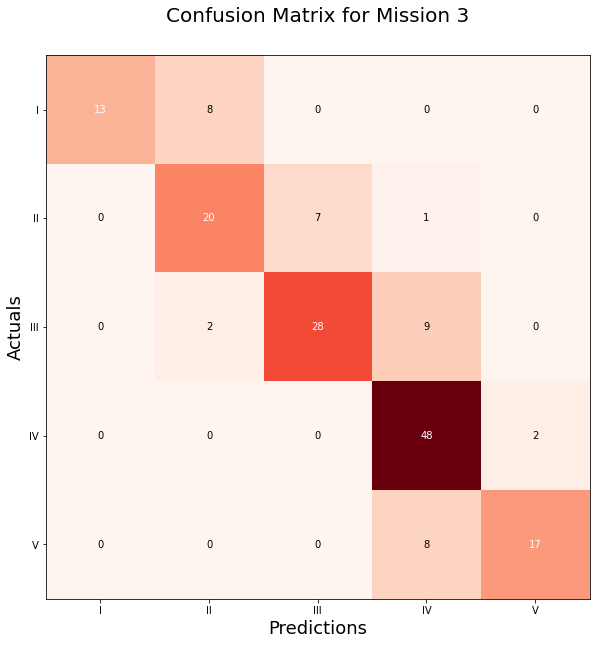

In [ ]:
RFE_classmodel(m3_train_norm,m3_test_norm,class_model=SVC(gamma='auto'),param = 20,mission_name='Mission 3')

ANN Classifier
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.6380368098159509
Macro f1-score: 0.6469096494902946




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

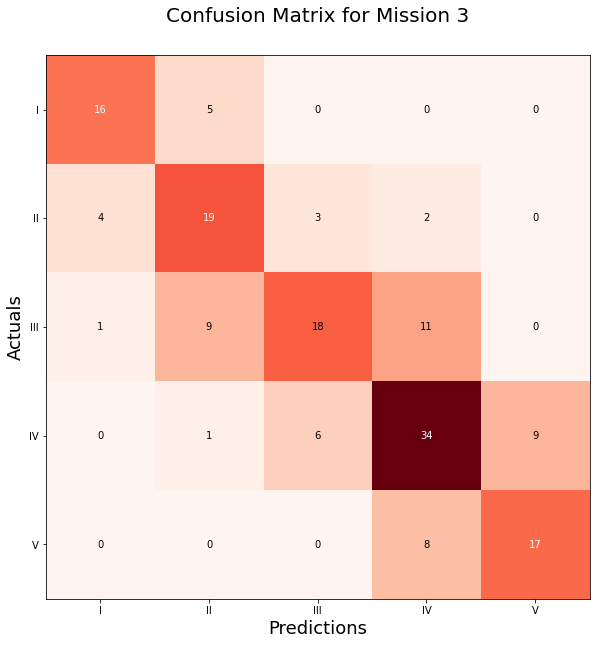

In [ ]:
MIC_classmodel(dataset_train_m3,dataset_test_m3,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 3')

*  Standardization


Accuracy: 0.5644171779141104
Macro f1-score: 0.5747569255375427




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

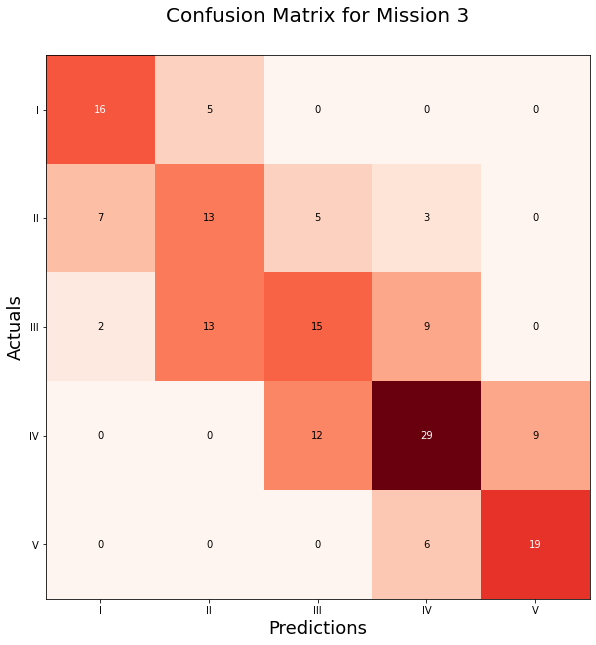

In [ ]:
MIC_classmodel(m3_train_scale,m3_test_scale,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 3')

*  Normalization

Accuracy: 0.6441717791411042
Macro f1-score: 0.6474495329232172




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

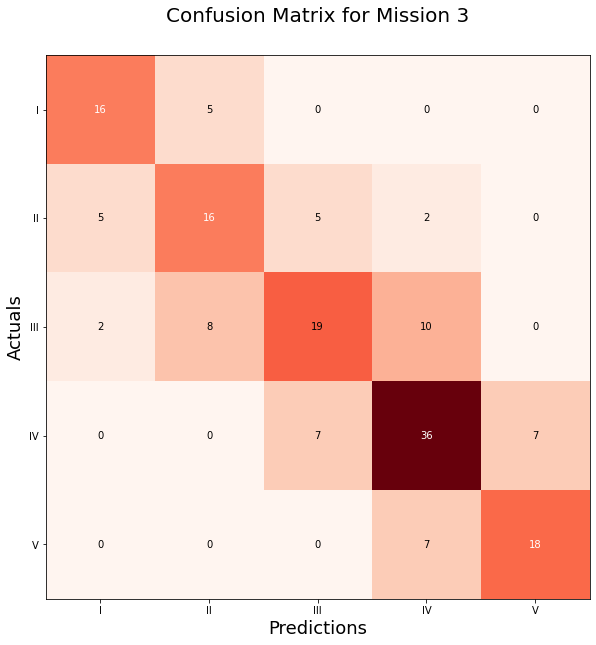

In [ ]:
MIC_classmodel(m3_train_norm,m3_test_norm,class_model = MLPClassifier(random_state=1, max_iter=300),param= 0.01,mission_name= 'Mission 3')

2. Chi2 Feature Selection

Accuracy: 0.4662576687116564
Macro f1-score: 0.4738696428047121




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

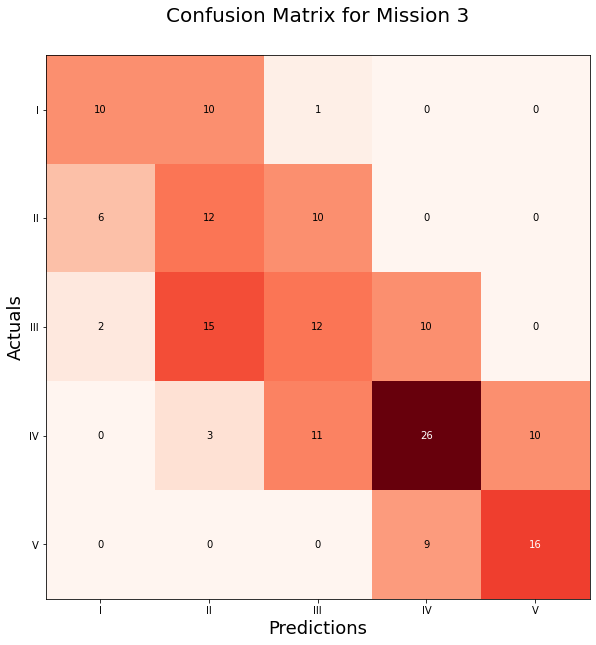

In [ ]:
chi2_classmodel(dataset_train_m3,dataset_test_m3,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 3')

*  Normalization

Accuracy: 0.6687116564417178
Macro f1-score: 0.6643524854932742




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

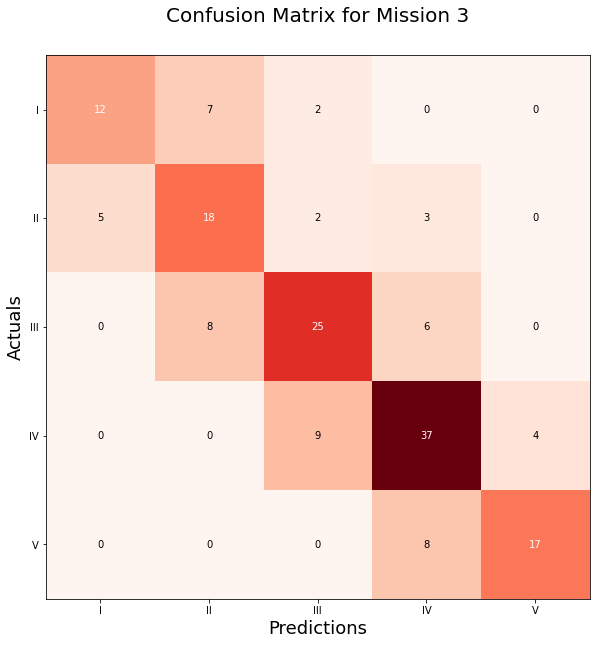

In [ ]:
chi2_classmodel(m3_train_norm,m3_test_norm,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 3')

3. Recursive Feature Elimination:

Accuracy: 0.754601226993865
Macro f1-score: 0.7312722033044852




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

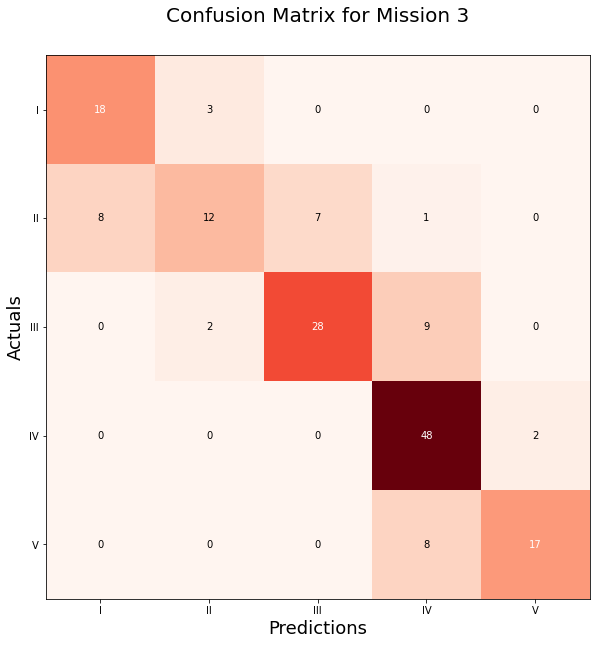

In [ ]:
RFE_classmodel(dataset_train_m3,dataset_test_m3,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 3')

*  Standardization


Accuracy: 0.588957055214724
Macro f1-score: 0.5970719825557634




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

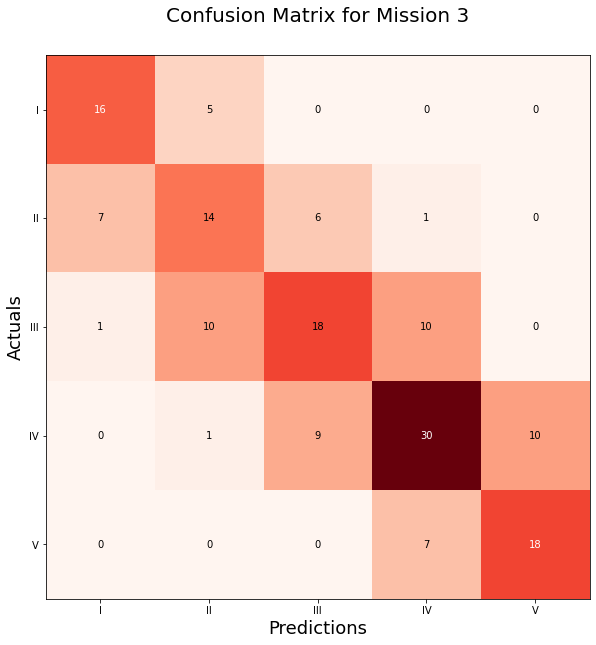

In [ ]:
RFE_classmodel(m3_train_scale,m3_test_scale,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 3')

*  Normalization

Accuracy: 0.754601226993865
Macro f1-score: 0.7312722033044852




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

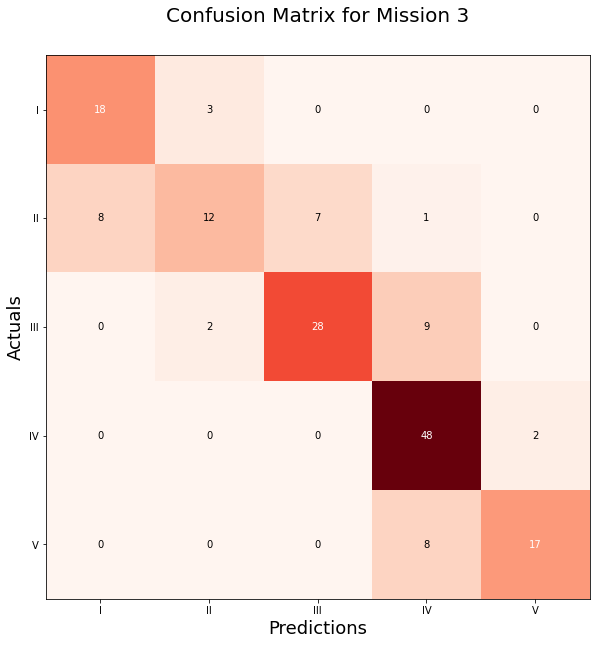

In [ ]:
RFE_classmodel(m3_train_norm,m3_test_norm,class_model= MLPClassifier(random_state=1, max_iter=300),param = 20,mission_name='Mission 3')

Random Forest Classifier
---

1. Mutual Information Classification Feature Selection:

Accuracy: 0.588957055214724
Macro f1-score: 0.47167295090493033




<Figure size 432x288 with 0 Axes>

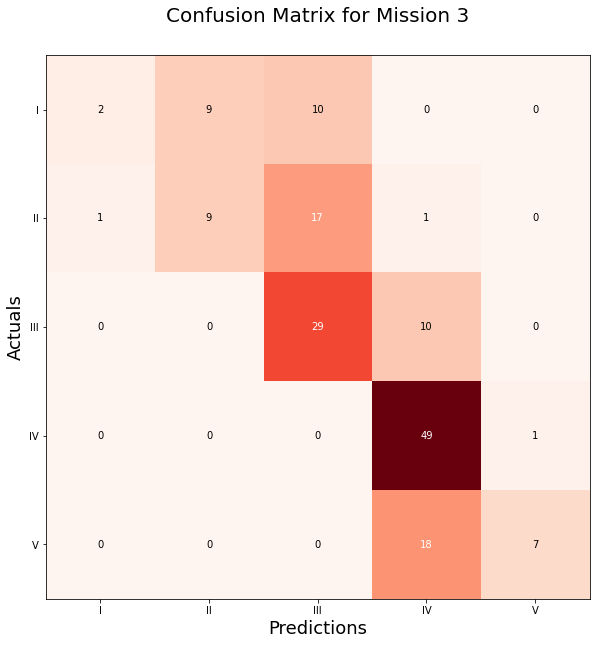

In [ ]:
MIC_classmodel(dataset_train_m3,dataset_test_m3,class_model = RandomForestClassifier(max_depth=2, random_state=0),param= 0.01,mission_name= 'Mission 3')

2. Chi2 Feature Selection

Accuracy: 0.6809815950920245
Macro f1-score: 0.6296336852237718




<Figure size 432x288 with 0 Axes>

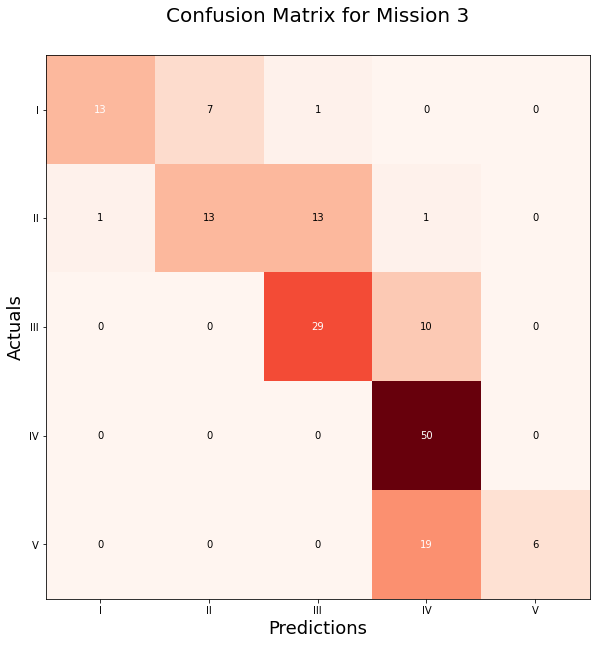

In [ ]:
chi2_classmodel(dataset_train_m3,dataset_test_m3,class_model=RandomForestClassifier(max_depth=2, random_state=0),param = 20,mission_name='Mission 3')

3. Recursive Feature Elimination:

Accuracy: 0.754601226993865
Macro f1-score: 0.7312722033044852




<Figure size 432x288 with 0 Axes>

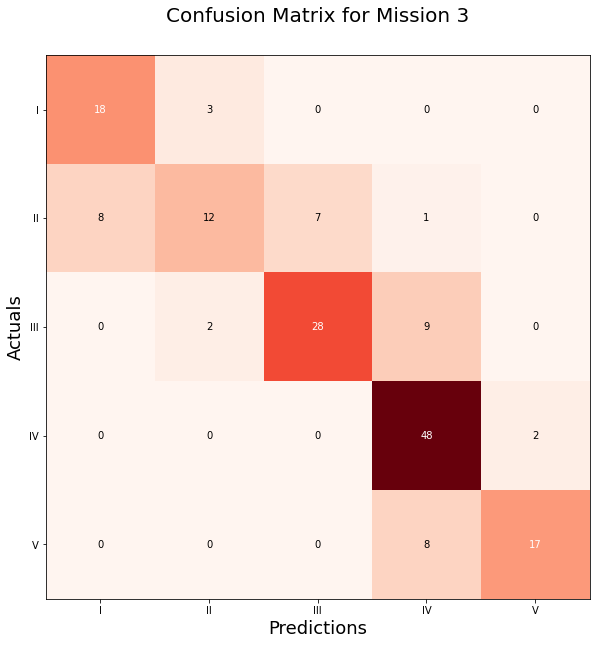

In [ ]:
RFE_classmodel(dataset_train_m3,dataset_test_m3,class_model=RandomForestClassifier(max_depth=2, random_state=0),param = 20,mission_name='Mission 3')